In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# data = pd.read_excel('AllStatesAndTerritoriesQTR4FY21.xlsx', sheet_name = ['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'FLORIDA', 'GEORGIA', 'GUAM', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'NORTHERN MARIANA ISLANDS', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGIN ISLANDS OF THE U.S.', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'])
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/AllStatesAndTerritoriesQTR4FY21.xlsx', sheet_name = None)
# data = pd.read_csv('AllStatesAndTerritoriesQTR4FY21.csv')

In [5]:
data.keys()

dict_keys(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'FLORIDA', 'GEORGIA', 'GUAM', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'NORTHERN MARIANA ISLANDS', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGIN ISLANDS OF THE U.S.', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'])

In [6]:
df = pd.concat(data[frame] for frame in data.keys()) 

In [7]:
df = df.reset_index()

In [8]:
df = df.drop(labels = 'index', axis = 1)
df

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type
0,AL,ABBEVILLE POLICE DEPT,2540-01-565-4700,BALLISTIC BLANKET KIT,10,Kit,15871.59,D,1.0,2018-01-30,State
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,Each,245.88,D,NaN,2016-06-02,State
2,AL,ABBEVILLE POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.00,C,1.0,2016-11-09,State
3,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9,Each,333.00,D,1.0,2016-09-14,State
4,AL,ABBEVILLE POLICE DEPT,5855-01-577-7174,"ILLUMINATOR,INFRARED",10,Each,926.00,D,1.0,2017-03-28,State
...,...,...,...,...,...,...,...,...,...,...,...
130953,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,State
130954,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,State
130955,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,State
130956,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,State


In [9]:
df.groupby('Ship Date').count()['State']

Ship Date
1980-01-01 09:07:07      1
1990-05-03 00:00:00    167
1991-09-16 00:00:00     69
1991-10-08 00:00:00      4
1992-09-08 00:00:00      3
                      ... 
2021-09-24 00:00:00     44
2021-09-27 00:00:00     11
2021-09-28 00:00:00     49
2021-09-29 00:00:00     99
2021-09-30 00:00:00     21
Name: State, Length: 5007, dtype: int64

In [9]:
# df.groupby('UI').count()['State']

In [10]:
df.groupby('DEMIL Code').count()['State']

DEMIL Code
A    18312
B      156
C     7012
D    93478
E      144
F     6198
Q     5658
Name: State, dtype: int64

In [11]:
df = df.fillna(1)

In [12]:
df.groupby('DEMIL IC').count()['State']

DEMIL IC
0.0        42
1.0    122354
3.0      5406
4.0        14
5.0         1
6.0       250
7.0      2891
Name: State, dtype: int64

In [13]:
# We will drop state since all the instances have station type as state which has no significance 
df.groupby('Station Type').count()['State']

Station Type
State    130958
Name: State, dtype: int64

In [14]:
df = df.drop('Station Type', 1)

In [15]:
df['Dates'] = pd.to_datetime(df['Ship Date']).dt.date
df['Time'] = pd.to_datetime(df['Ship Date']).dt.time

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130958 entries, 0 to 130957
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   State              130958 non-null  object        
 1   Agency Name        130958 non-null  object        
 2   NSN                130958 non-null  object        
 3   Item Name          130958 non-null  object        
 4   Quantity           130958 non-null  int64         
 5   UI                 130958 non-null  object        
 6   Acquisition Value  130958 non-null  float64       
 7   DEMIL Code         130958 non-null  object        
 8   DEMIL IC           130958 non-null  float64       
 9   Ship Date          130958 non-null  datetime64[ns]
 10  Dates              130958 non-null  object        
 11  Time               130958 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 12.0+ MB


In [17]:
df

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Dates,Time
0,AL,ABBEVILLE POLICE DEPT,2540-01-565-4700,BALLISTIC BLANKET KIT,10,Kit,15871.59,D,1.0,2018-01-30,2018-01-30,00:00:00
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,Each,245.88,D,1.0,2016-06-02,2016-06-02,00:00:00
2,AL,ABBEVILLE POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.00,C,1.0,2016-11-09,2016-11-09,00:00:00
3,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9,Each,333.00,D,1.0,2016-09-14,2016-09-14,00:00:00
4,AL,ABBEVILLE POLICE DEPT,5855-01-577-7174,"ILLUMINATOR,INFRARED",10,Each,926.00,D,1.0,2017-03-28,2017-03-28,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
130953,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00
130954,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00
130955,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00
130956,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00


In [18]:
df.groupby('Dates').count()['State']

Dates
1980-01-01      1
1990-05-03    167
1991-09-16     69
1991-10-08      4
1992-09-08      3
             ... 
2021-09-24     44
2021-09-27     11
2021-09-28     49
2021-09-29     99
2021-09-30     21
Name: State, Length: 4792, dtype: int64

In [19]:
df.groupby('Time').count()['State']

Time
00:00:00           130655
00:15:31.999000        13
00:15:41                1
05:53:04.999000         1
06:22:04.999000         1
                    ...  
15:49:16.999000         1
15:53:21                1
16:22:59.999000         1
16:27:55                1
16:29:07.999000         1
Name: State, Length: 205, dtype: int64

In [20]:
df['Time'] = df['Time'].astype('str')

In [21]:
df[['hour', 'minute', 'second']] = df['Time'].str.split(':', 3, expand = True)

In [22]:
df['Dates'] = df['Dates'].astype('str')

In [23]:
df[['year', 'month', 'day']] = df['Dates'].str.split('-', 3, expand = True)

In [24]:
df

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,hour,minute,second,year,month,day
0,AL,ABBEVILLE POLICE DEPT,2540-01-565-4700,BALLISTIC BLANKET KIT,10,Kit,15871.59,D,1.0,2018-01-30,2018-01-30,00:00:00,00,00,00,2018,01,30
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,Each,245.88,D,1.0,2016-06-02,2016-06-02,00:00:00,00,00,00,2016,06,02
2,AL,ABBEVILLE POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.00,C,1.0,2016-11-09,2016-11-09,00:00:00,00,00,00,2016,11,09
3,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9,Each,333.00,D,1.0,2016-09-14,2016-09-14,00:00:00,00,00,00,2016,09,14
4,AL,ABBEVILLE POLICE DEPT,5855-01-577-7174,"ILLUMINATOR,INFRARED",10,Each,926.00,D,1.0,2017-03-28,2017-03-28,00:00:00,00,00,00,2017,03,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130953,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,00,00,00,1993,09,01
130954,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,00,00,00,1993,09,01
130955,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,00,00,00,1993,09,01
130956,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,00,00,00,1993,09,01


In [25]:
df.groupby('second').count()['State']

second
00           130659
00.999000         1
01.999000         5
03                4
04                5
              ...  
56.999000         1
57                1
58                2
58.999000         2
59.999000         3
Name: State, Length: 101, dtype: int64

In [26]:
df[['second', 'ms']] = df['second'].str.split('.', 2, expand = True)

In [27]:
df

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,hour,minute,second,year,month,day,ms
0,AL,ABBEVILLE POLICE DEPT,2540-01-565-4700,BALLISTIC BLANKET KIT,10,Kit,15871.59,D,1.0,2018-01-30,2018-01-30,00:00:00,00,00,00,2018,01,30,None
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,Each,245.88,D,1.0,2016-06-02,2016-06-02,00:00:00,00,00,00,2016,06,02,None
2,AL,ABBEVILLE POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.00,C,1.0,2016-11-09,2016-11-09,00:00:00,00,00,00,2016,11,09,None
3,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9,Each,333.00,D,1.0,2016-09-14,2016-09-14,00:00:00,00,00,00,2016,09,14,None
4,AL,ABBEVILLE POLICE DEPT,5855-01-577-7174,"ILLUMINATOR,INFRARED",10,Each,926.00,D,1.0,2017-03-28,2017-03-28,00:00:00,00,00,00,2017,03,28,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130953,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,00,00,00,1993,09,01,None
130954,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,00,00,00,1993,09,01,None
130955,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,00,00,00,1993,09,01,None
130956,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,00,00,00,1993,09,01,None


In [28]:
# Milli second is not that revelant and it is not going to a difference, meaning there is no insight that would be 
# useful in knowing that the shipment was done at that milli second
df.groupby('ms').count()['State']

ms
999000    133
Name: State, dtype: int64

In [29]:
# So now we will combine hours, minutes and seconds to see at what particular time we most transactions done
df['Time'] = df['hour'] + ':' + df['minute'] + ':' + df['second']

In [30]:
df

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,hour,minute,second,year,month,day,ms
0,AL,ABBEVILLE POLICE DEPT,2540-01-565-4700,BALLISTIC BLANKET KIT,10,Kit,15871.59,D,1.0,2018-01-30,2018-01-30,00:00:00,00,00,00,2018,01,30,None
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,Each,245.88,D,1.0,2016-06-02,2016-06-02,00:00:00,00,00,00,2016,06,02,None
2,AL,ABBEVILLE POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.00,C,1.0,2016-11-09,2016-11-09,00:00:00,00,00,00,2016,11,09,None
3,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9,Each,333.00,D,1.0,2016-09-14,2016-09-14,00:00:00,00,00,00,2016,09,14,None
4,AL,ABBEVILLE POLICE DEPT,5855-01-577-7174,"ILLUMINATOR,INFRARED",10,Each,926.00,D,1.0,2017-03-28,2017-03-28,00:00:00,00,00,00,2017,03,28,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130953,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,00,00,00,1993,09,01,None
130954,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,00,00,00,1993,09,01,None
130955,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,00,00,00,1993,09,01,None
130956,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,00,00,00,1993,09,01,None


In [31]:
df.groupby('Time').count()['State']

Time
00:00:00    130655
00:15:31        13
00:15:41         1
05:53:04         1
06:22:04         1
             ...  
15:49:16         1
15:53:21         1
16:22:59         1
16:27:55         1
16:29:07         1
Name: State, Length: 205, dtype: int64

In [32]:
# Now we will remove hour, minute, second and ms
df = df.drop(labels = ['hour', 'minute', 'second', 'ms'], axis = 1)

In [33]:
df

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,year,month,day
0,AL,ABBEVILLE POLICE DEPT,2540-01-565-4700,BALLISTIC BLANKET KIT,10,Kit,15871.59,D,1.0,2018-01-30,2018-01-30,00:00:00,2018,01,30
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,Each,245.88,D,1.0,2016-06-02,2016-06-02,00:00:00,2016,06,02
2,AL,ABBEVILLE POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.00,C,1.0,2016-11-09,2016-11-09,00:00:00,2016,11,09
3,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9,Each,333.00,D,1.0,2016-09-14,2016-09-14,00:00:00,2016,09,14
4,AL,ABBEVILLE POLICE DEPT,5855-01-577-7174,"ILLUMINATOR,INFRARED",10,Each,926.00,D,1.0,2017-03-28,2017-03-28,00:00:00,2017,03,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130953,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,1993,09,01
130954,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,1993,09,01
130955,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,1993,09,01
130956,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,1993,09,01


In [34]:
df.groupby('year').count()['State'] # 33

year
1980        1
1990      167
1991       73
1992        3
1993      466
1994     1104
1995     1047
1996     1452
1997     1770
1998     3609
1999     2208
2000     2320
2001      738
2002     5307
2003     4067
2004     3220
2005     3634
2006     3137
2007     1759
2008     2416
2009     2104
2010     4535
2011    11521
2012    15648
2013     6702
2014     9396
2015     4241
2016     4342
2017     5341
2018     3661
2019     3157
2020    10026
2021    11786
Name: State, dtype: int64

In [35]:
df.groupby('month').count()['State'] 

month
01    12005
02     8716
03    10260
04    11438
05     9233
06     8132
07    10696
08    13290
09    14543
10    10832
11    12497
12     9316
Name: State, dtype: int64

In [39]:
# From this we see that attributes have no correlation with each other, so deep learning will help us determine the 
# features, but first we need to analysis and see if there is any insights in the data
df.corr()

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,year,month,day
State,1.000000,0.007716,0.009308,0.008374,-0.010061,-0.014232,0.001140,0.005336,0.009781,0.061788,0.061545,-0.014207,0.062717,-0.017596,0.004519
Agency Name,0.007716,1.000000,0.021460,-0.012198,0.007939,0.026054,-0.004720,-0.031039,-0.004451,0.015957,0.015629,0.001848,0.007195,0.008407,-0.016273
NSN,0.009308,0.021460,1.000000,-0.360693,0.081456,0.197884,0.008735,-0.357071,0.160561,0.632406,0.630220,-0.002132,0.575653,-0.016005,-0.054618
Item Name,0.008374,-0.012198,-0.360693,1.000000,-0.067334,-0.081001,-0.032489,0.182463,-0.028624,-0.257155,-0.256221,-0.007662,-0.236292,0.025630,0.021839
Quantity,-0.010061,0.007939,0.081456,-0.067334,1.000000,0.021148,-0.009467,-0.078962,-0.004195,0.099630,0.099395,0.004515,0.091219,-0.004046,-0.009250
UI,-0.014232,0.026054,0.197884,-0.081001,0.021148,1.000000,-0.006709,-0.170494,-0.009302,0.152234,0.151251,-0.004384,0.131629,-0.001572,-0.016655
Acquisition Value,0.001140,-0.004720,0.008735,-0.032489,-0.009467,-0.006709,1.000000,-0.015225,0.025192,0.053920,0.053932,0.133813,0.053366,-0.007353,-0.016627
DEMIL Code,0.005336,-0.031039,-0.357071,0.182463,-0.078962,-0.170494,-0.015225,1.000000,0.287777,-0.392149,-0.389692,-0.003535,-0.327264,-0.016848,0.023546
DEMIL IC,0.009781,-0.004451,0.160561,-0.028624,-0.004195,-0.009302,0.025192,0.287777,1.000000,0.166042,0.164683,0.015078,0.157679,0.003491,-0.009515
Ship Date,0.061788,0.015957,0.632406,-0.257155,0.099630,0.152234,0.053920,-0.392149,0.166042,1.000000,0.999760,0.018035,0.967143,-0.014997,-0.037529


In [40]:
df

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,year,month,day,m&y
0,1,9,2255,253,10,17,15871.59,3,1.0,4064,3877,0,29,0,29,2018-01
1,1,9,766,2750,1,13,245.88,3,1.0,3600,3444,0,27,5,1,2016-06
2,1,9,1951,2554,1,13,658000.00,2,1.0,3724,3558,0,27,10,8,2016-11
3,1,9,608,3729,9,13,333.00,3,1.0,3677,3518,0,27,8,13,2016-09
4,1,9,5631,1996,10,13,926.00,3,1.0,3832,3658,0,28,2,27,2017-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130953,52,5427,39,3375,1,13,138.00,3,1.0,22,22,0,4,8,0,1993-09
130954,52,5427,39,3375,1,13,138.00,3,1.0,22,22,0,4,8,0,1993-09
130955,52,5427,39,3375,1,13,138.00,3,1.0,22,22,0,4,8,0,1993-09
130956,52,5427,39,3375,1,13,138.00,3,1.0,22,22,0,4,8,0,1993-09


In [46]:
# Total expenditure is calculated by multiplying the Acquisition Value with Quantity
df['Quantity'] = df['Quantity'].astype(float)
df['Total spending'] = df['Acquisition Value'] * df['Quantity']

In [47]:
df

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,year,month,day,Total spending
0,AL,ABBEVILLE POLICE DEPT,2540-01-565-4700,BALLISTIC BLANKET KIT,10.0,Kit,15871.59,D,1.0,2018-01-30,2018-01-30,00:00:00,2018,01,30,158715.90
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1.0,Each,245.88,D,1.0,2016-06-02,2016-06-02,00:00:00,2016,06,02,245.88
2,AL,ABBEVILLE POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1.0,Each,658000.00,C,1.0,2016-11-09,2016-11-09,00:00:00,2016,11,09,658000.00
3,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9.0,Each,333.00,D,1.0,2016-09-14,2016-09-14,00:00:00,2016,09,14,2997.00
4,AL,ABBEVILLE POLICE DEPT,5855-01-577-7174,"ILLUMINATOR,INFRARED",10.0,Each,926.00,D,1.0,2017-03-28,2017-03-28,00:00:00,2017,03,28,9260.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130953,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1.0,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,1993,09,01,138.00
130954,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1.0,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,1993,09,01,138.00
130955,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1.0,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,1993,09,01,138.00
130956,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1.0,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,1993,09,01,138.00


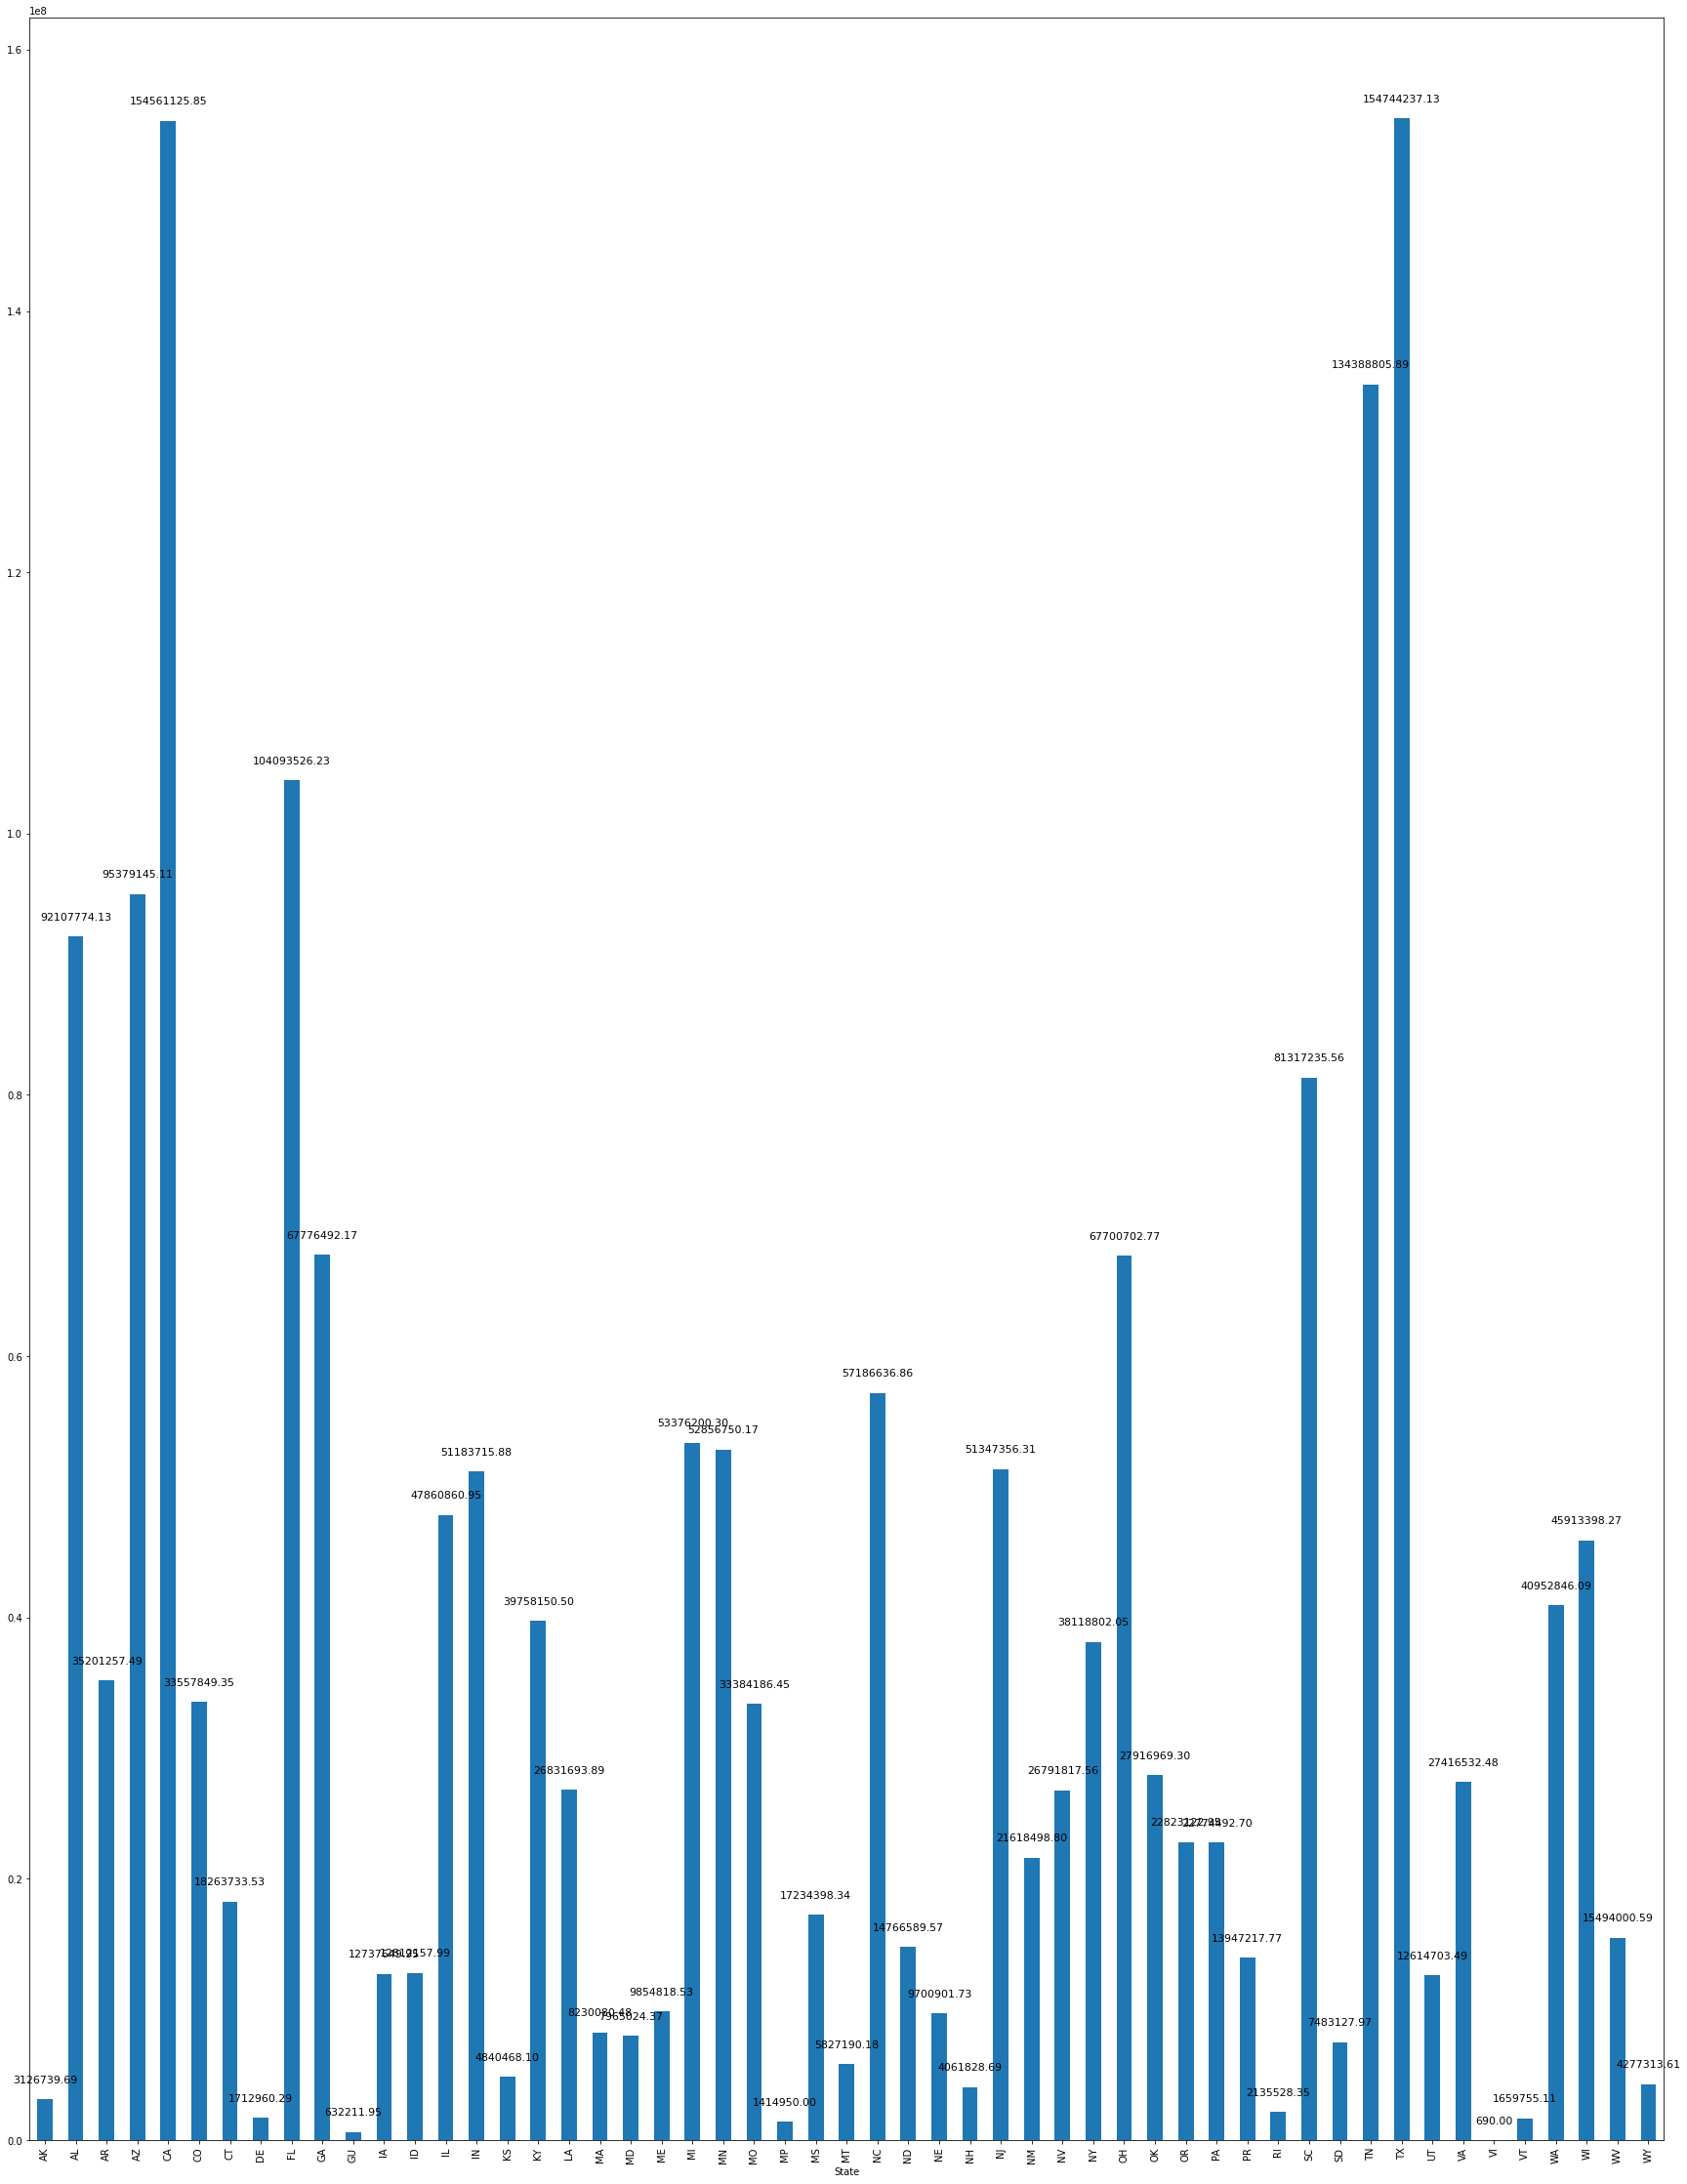

In [48]:
# 1. Top 5 Highest and Lowest expenditure among the states in USA ?
plt.figure(figsize=(30,40))
ax = df.groupby('State').sum()['Total spending'].plot(kind = 'bar')

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
    
# From the below diagram we see the states military expenditure from 1980 - 2021
# we see that TX (TEXAS) is having the highest expenditure which is $1.547442e+08, and the second is 
# CA (CALIFORNIA) which is around $1.545611e+08 and the third highest is TN (TENNESSEE) which is having around $1.343888e+08 and the fourth highest
# is FL (FLORIDA) which is having a total expenditure around $1.040935e+08 and the fifth highest is AZ (ARIZONA) with an expenditure
# of $9.537915e+07


# Top 5 States with the highest expenditure from 1980 - 2021
# 1. TX (TEXAS) = $1.547442e+08 (approx) $154,744,200
# 2. CA (CALIFORNIA) = $1.545611e+08 (approx) $154,561,100
# 3. TN (TENNESSEE) = $1.343888e+08 (approx) $134,388,800
# 4. FL (FLORIDA) = $1.040935e+08 (approx) $104,093,500
# 5. AZ (ARIZONA) = $9.537915e+07 (approx) $95,379,150


# Top 5 States with the lowest expenditure from 1980 - 2021
# 1. VI (VIRGIN ISLANDS OF THE U.S.) = $690.00 (approx)
# 2. GU(GUAM) = $632,211.95 (approx)
# 3. MP(MISSISSIPPI) = $1,414,950.00 (approx)
# 4. VT (VERMONT) = $1659755.11 (approx)
# 5. DE (DELAWARE) = $1712960.29 (approx)

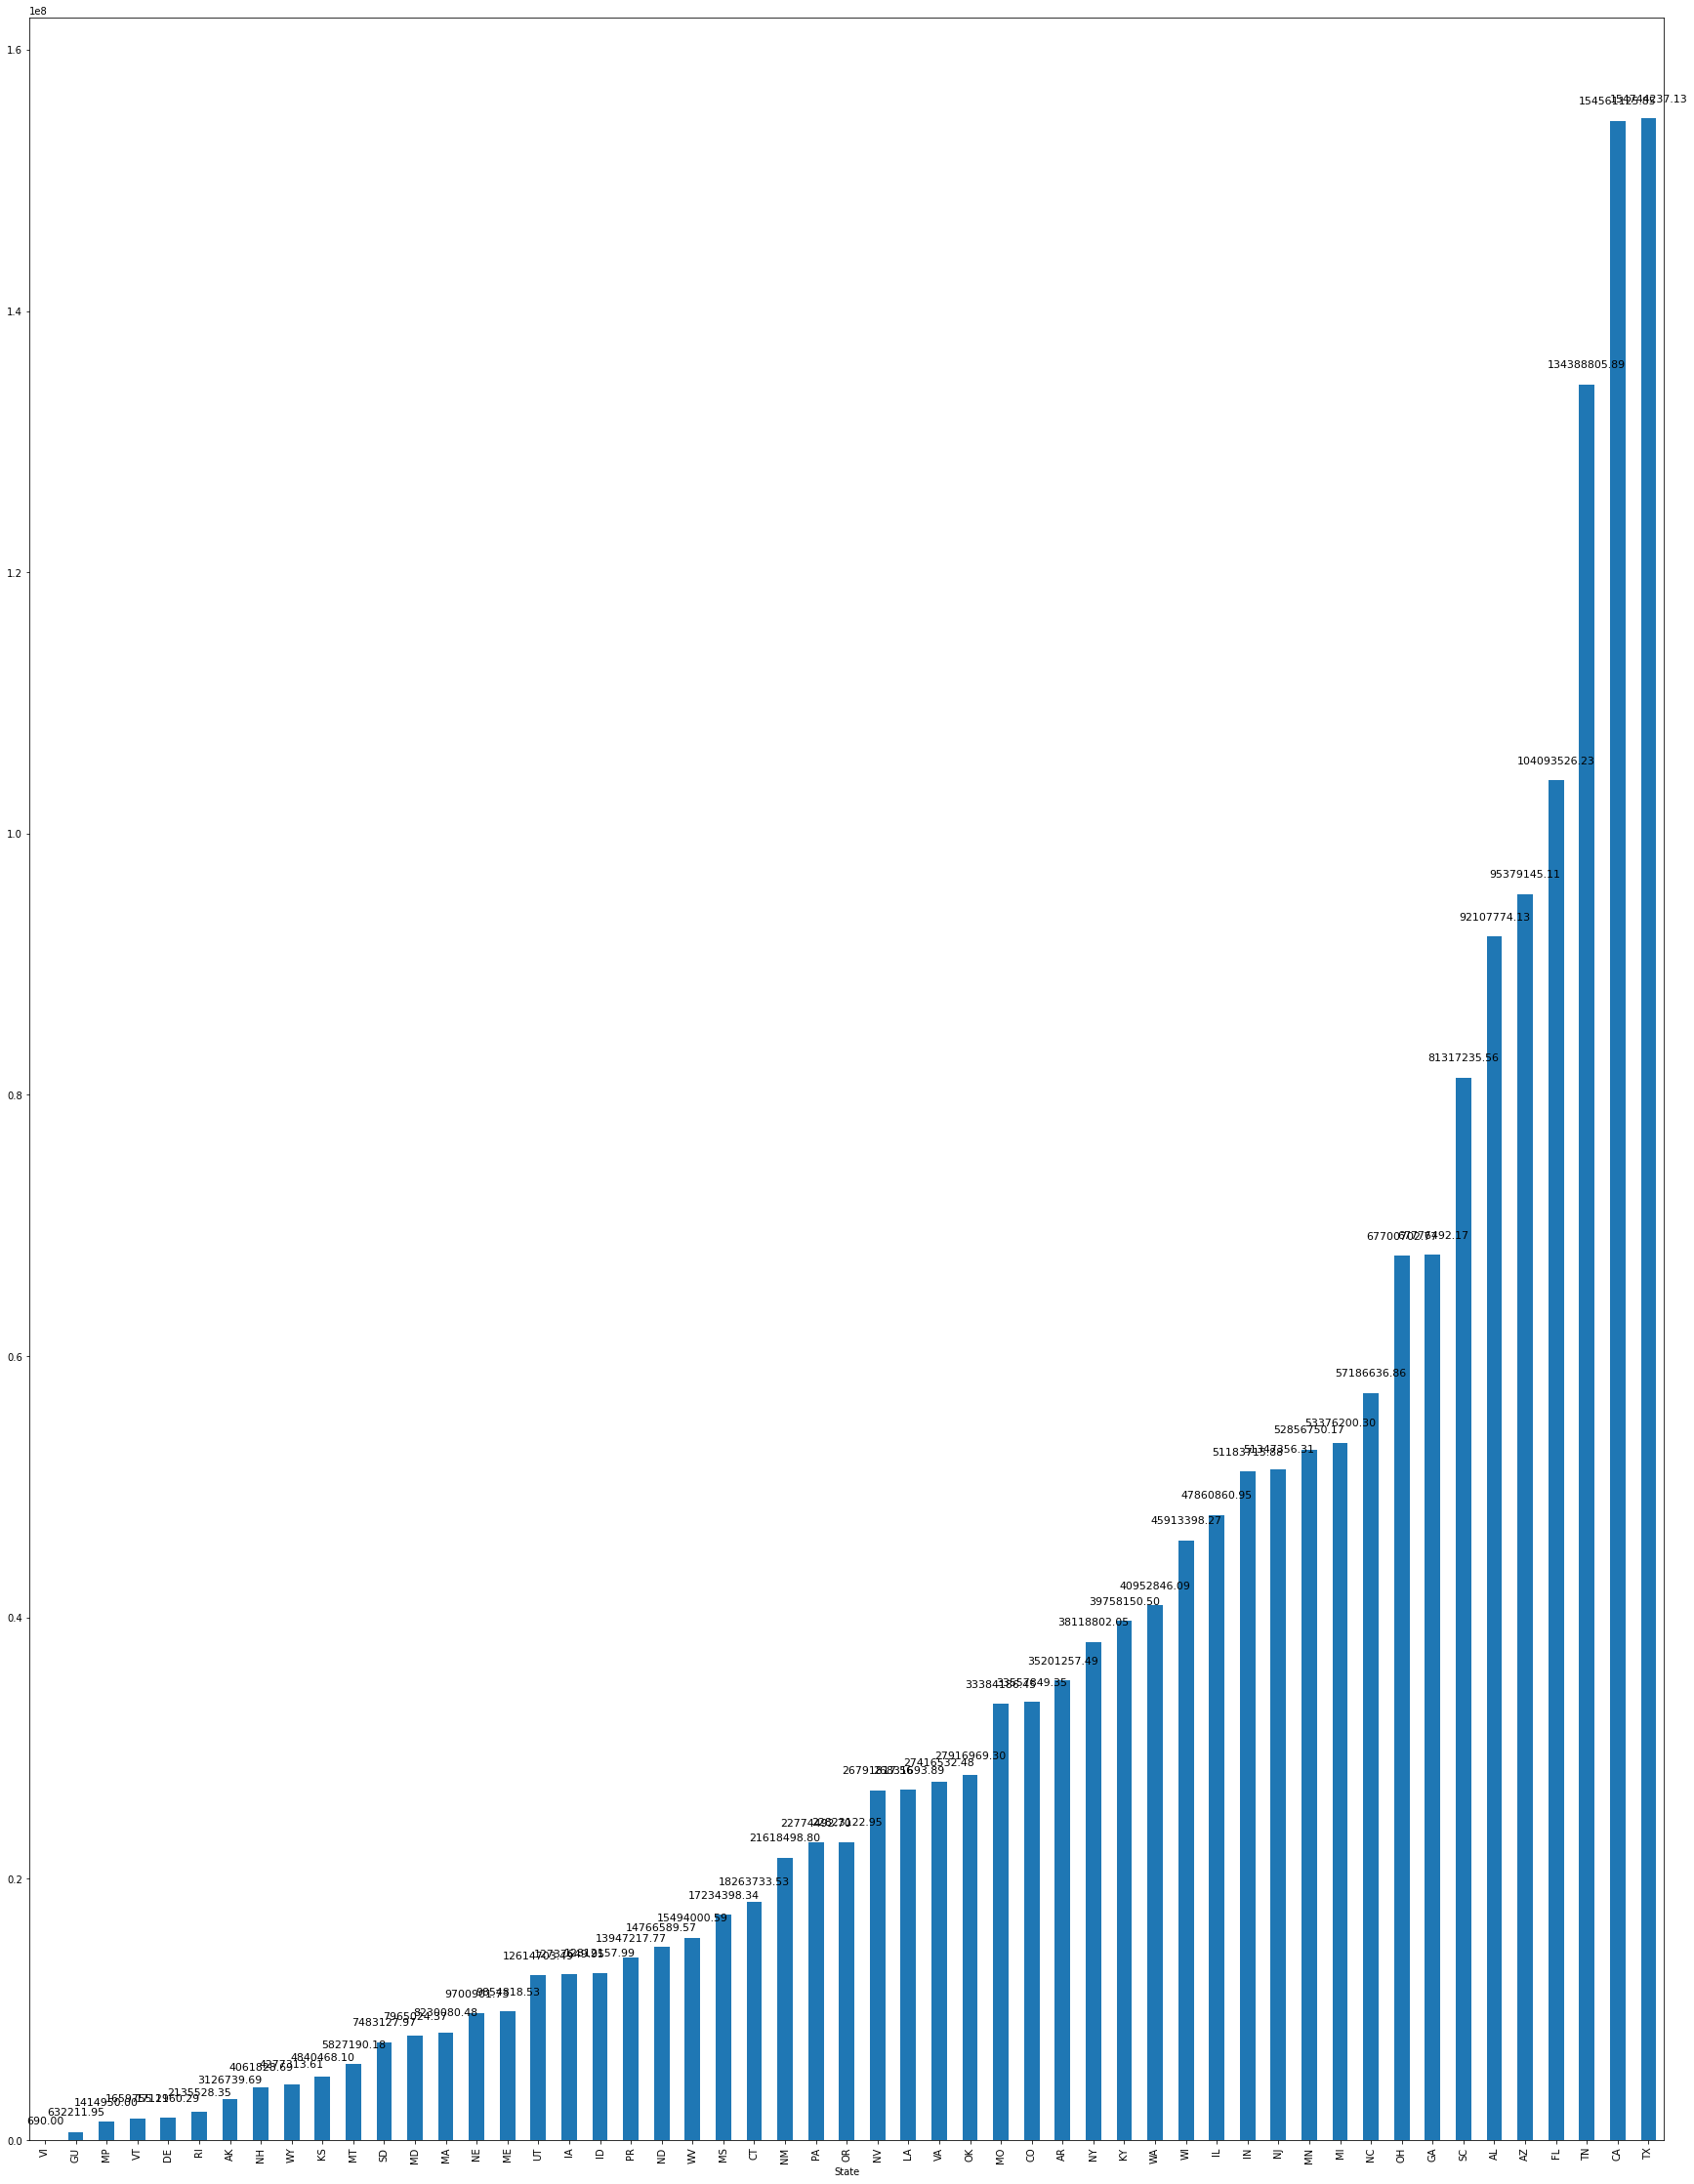

In [49]:
plt.figure(figsize=(30,40))
ax = df.groupby('State').sum()['Total spending'].sort_values(ascending = True).plot(kind = 'bar')

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')

In [50]:
df.groupby('State').sum()['Total spending'].nsmallest(5)

State
VI        690.00
GU     632211.95
MP    1414950.00
VT    1659755.11
DE    1712960.29
Name: Total spending, dtype: float64

In [51]:
df.groupby('State').sum()['Total spending'].nlargest(5)

State
TX    1.547442e+08
CA    1.545611e+08
TN    1.343888e+08
FL    1.040935e+08
AZ    9.537915e+07
Name: Total spending, dtype: float64

In [52]:
# 2. Top 5 years which had the highest expenditure and lowest expenditure between 1980 - 2021 ?
df.groupby(df.year).sum()['Total spending']

year
1980    6.507000e+04
1990    2.304600e+04
1991    1.007400e+04
1992    7.261800e+03
1993    6.611300e+04
1994    7.490500e+05
1995    2.484815e+06
1996    4.751491e+06
1997    5.428881e+06
1998    5.531501e+06
1999    1.318228e+06
2000    3.779709e+06
2001    1.887020e+06
2002    5.362213e+06
2003    2.885378e+06
2004    2.836588e+06
2005    7.830949e+06
2006    1.150208e+07
2007    7.187124e+06
2008    1.812329e+07
2009    1.538511e+07
2010    3.051030e+07
2011    5.192036e+07
2012    9.521804e+07
2013    1.804401e+08
2014    3.851037e+08
2015    1.490329e+08
2016    2.478768e+08
2017    1.295134e+08
2018    8.198010e+07
2019    1.521905e+08
2020    1.499985e+08
2021    1.487346e+08
Name: Total spending, dtype: float64

In [53]:
# Top 5 years with the highest expenditiure
df.groupby(df.year).sum()['Total spending'].nlargest(5)

year
2014    3.851037e+08
2016    2.478768e+08
2013    1.804401e+08
2019    1.521905e+08
2020    1.499985e+08
Name: Total spending, dtype: float64

In [54]:
# Top 5 years with the lowest expenditiure
df.groupby(df.year).sum()['Total spending'].nsmallest(5)

year
1992     7261.8
1991    10074.0
1990    23046.0
1980    65070.0
1993    66113.0
Name: Total spending, dtype: float64

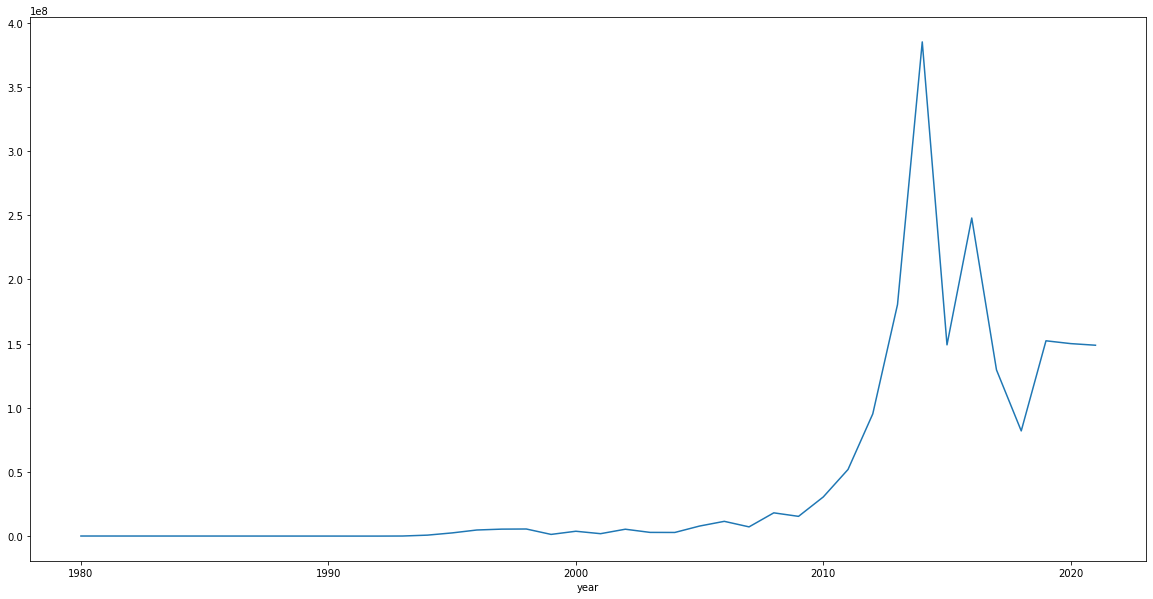

In [55]:
plt.figure(figsize=(20,10))
df['year'] = df['year'].astype('int')
df.groupby(df.year).sum()['Total spending'].plot()

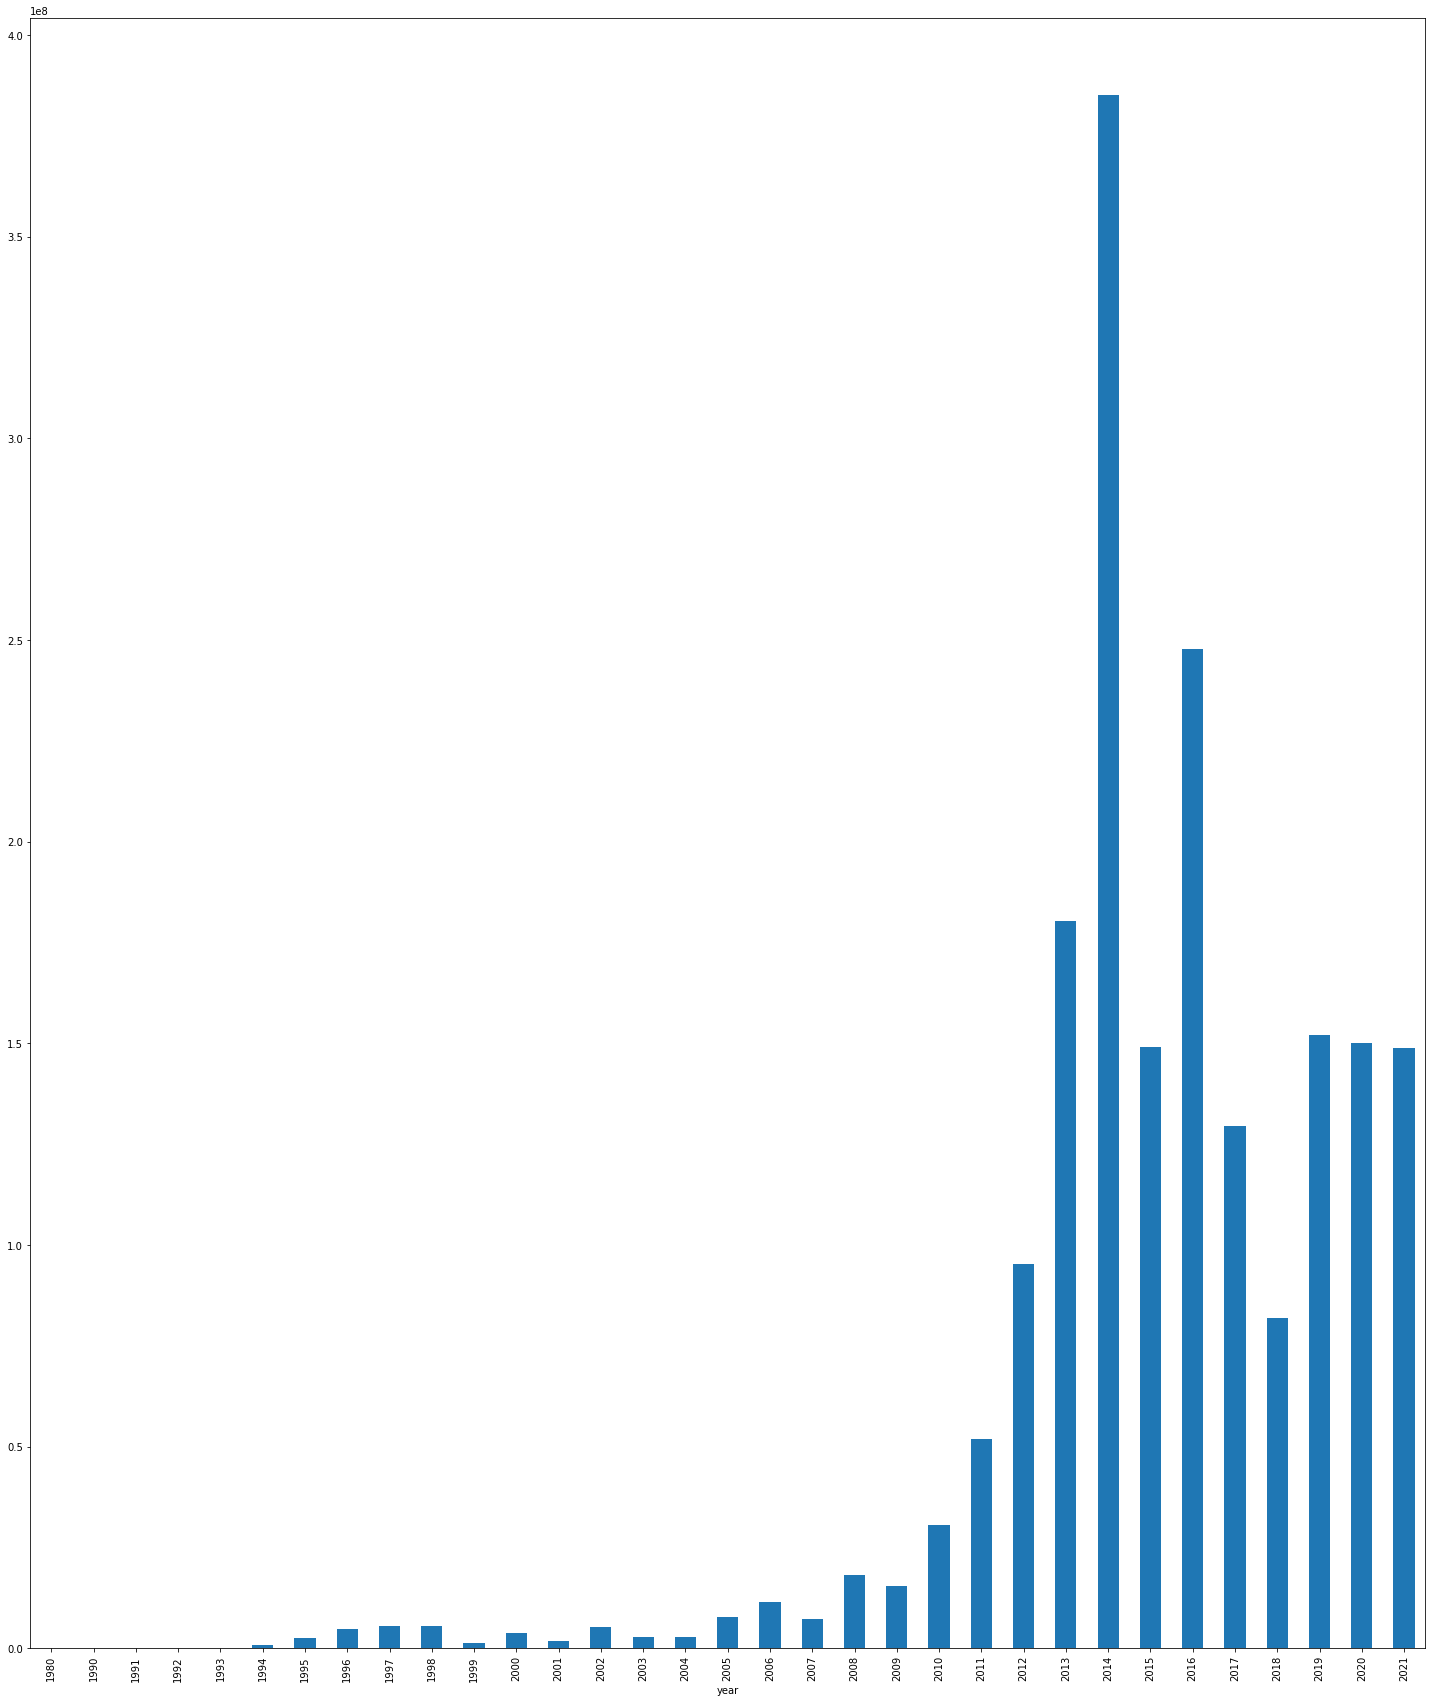

In [56]:
plt.figure(figsize=(25,30))
df['year'] = df['year'].astype('int')
df.groupby(df.year).sum()['Total spending'].plot(kind = 'bar')

    
# From the 2000 it started to increase and then from 2014 it sky rocketed where the expenditure was at it's peak then started falling but gained an increase in 2019 and then fell
# 2014 had the highest expenditure around $380,000,000

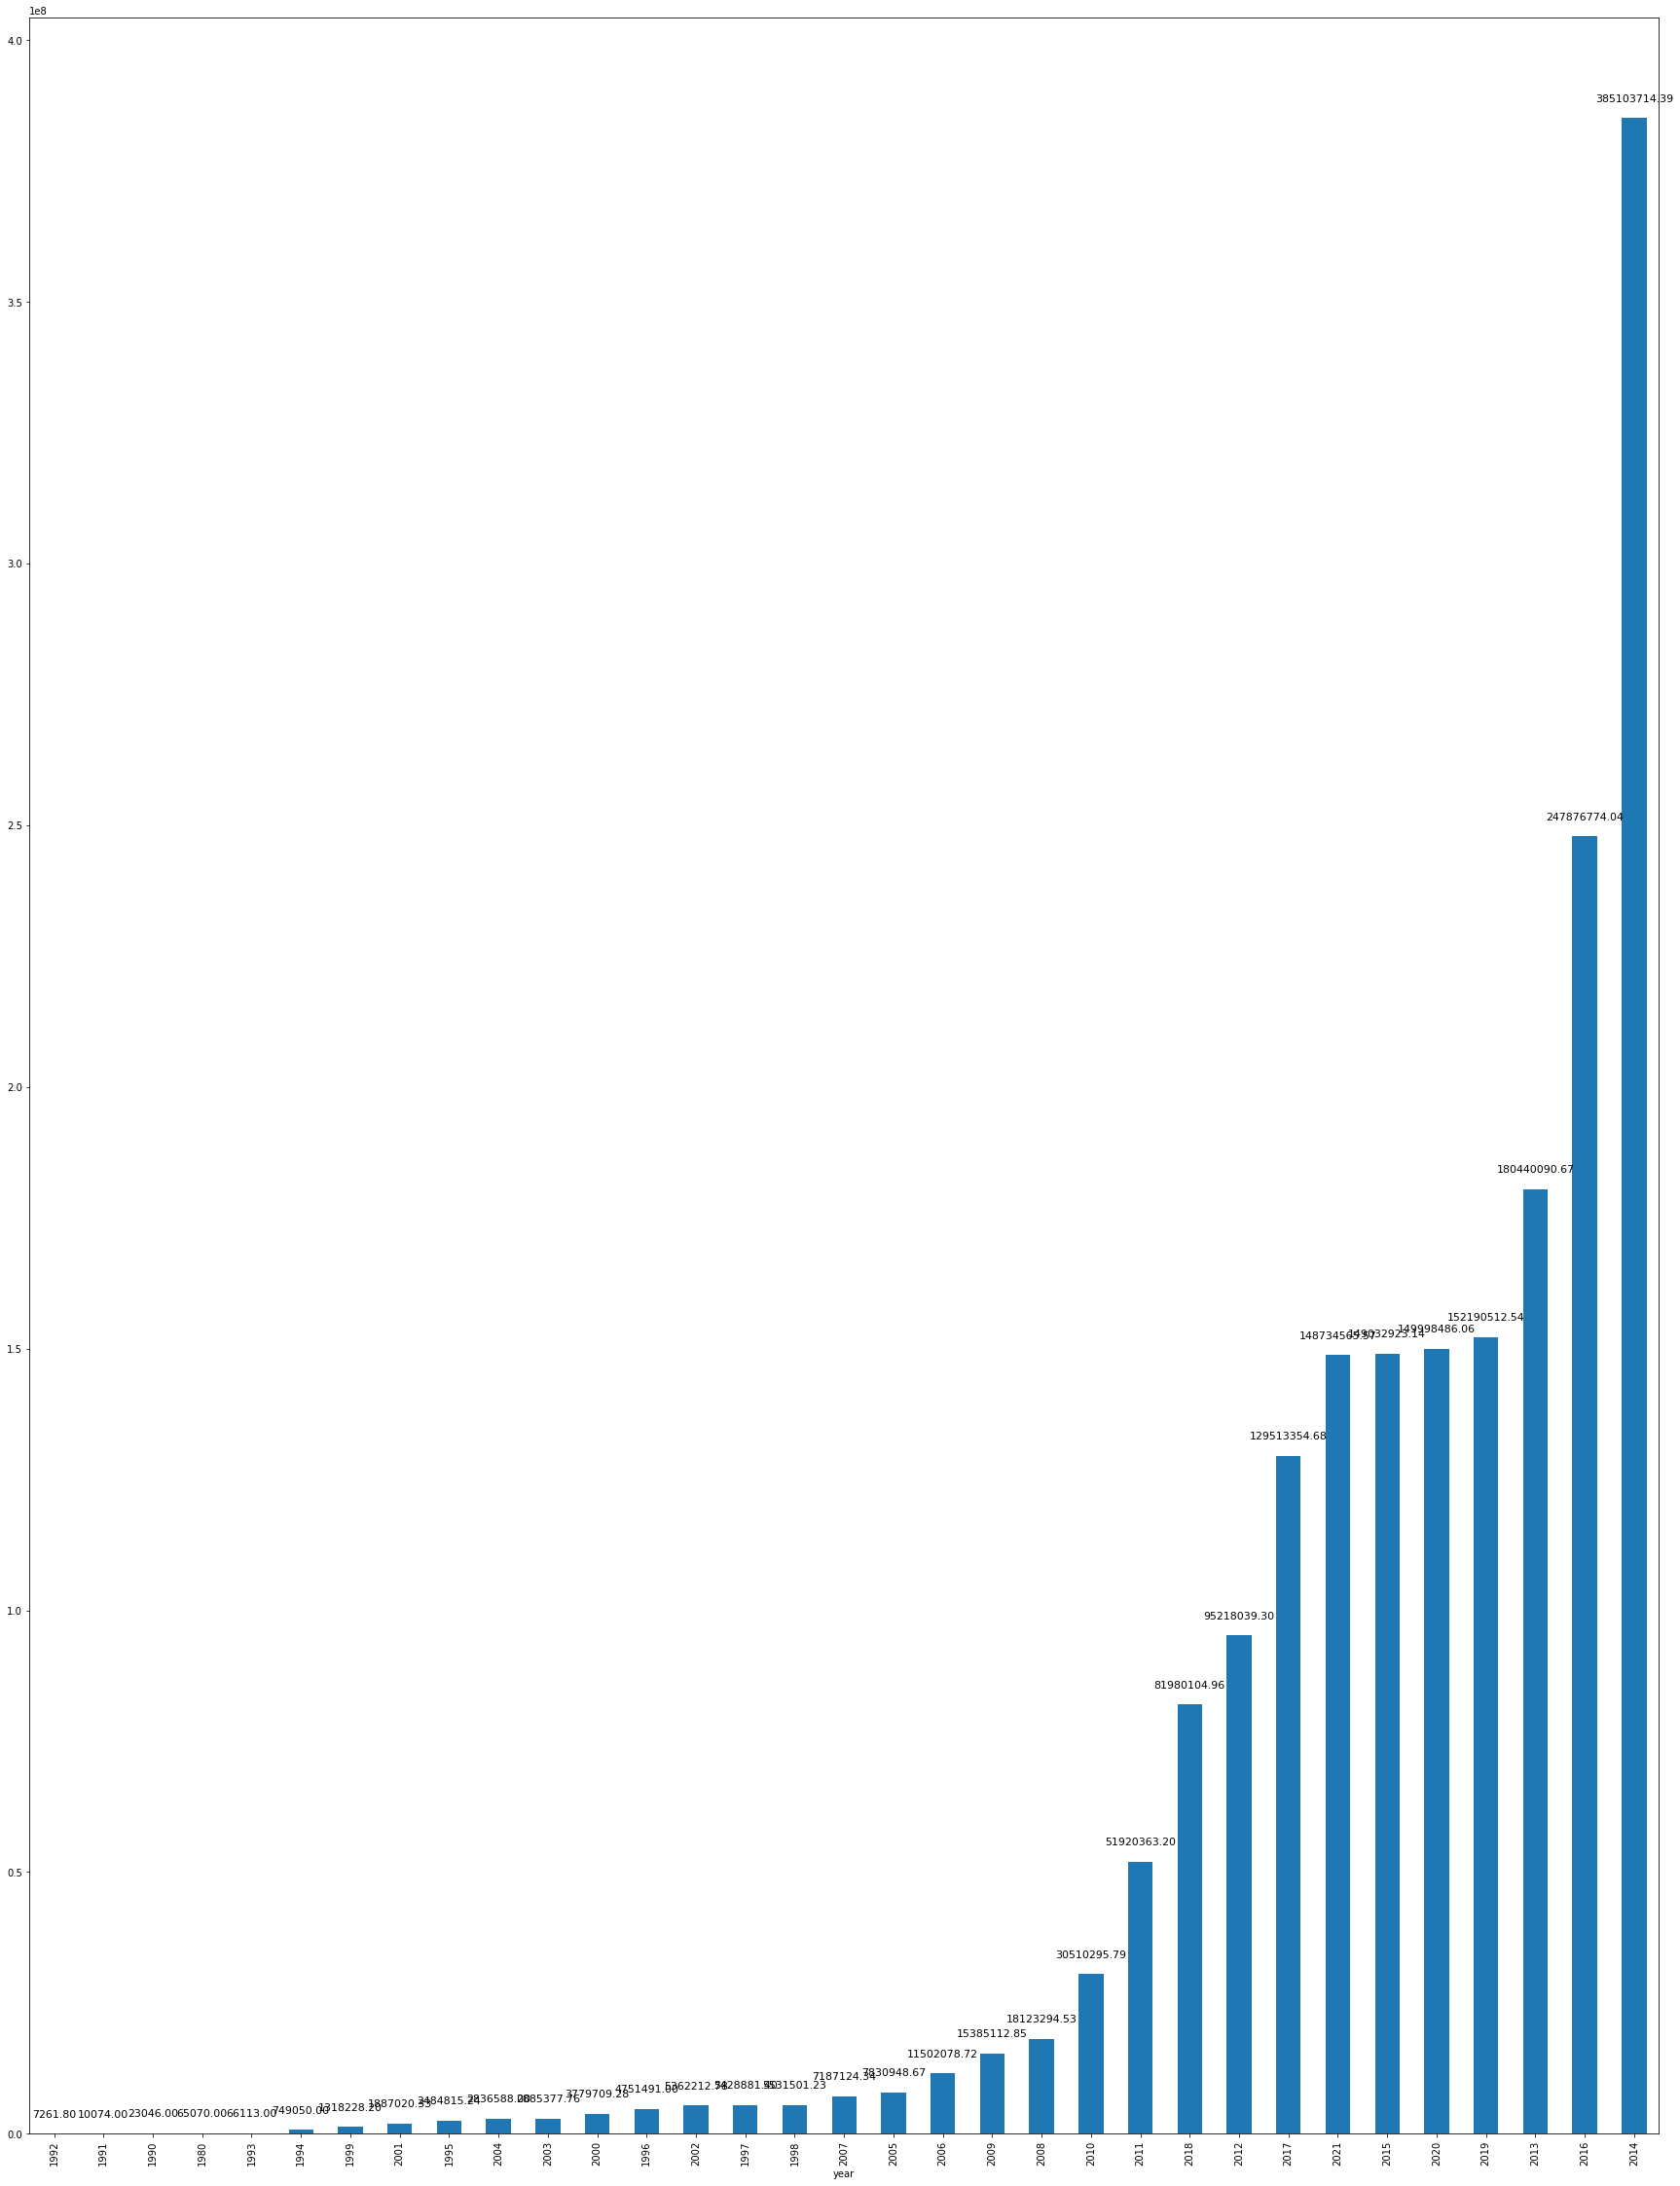

In [57]:
plt.figure(figsize=(30,40))
ax = df.groupby(df.year).sum()['Total spending'].sort_values(ascending = True).plot(kind = 'bar')

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')

In [58]:
# 3. Which decade had the highest expenditure and the lowest expenditure ?
df['year'] = df['year'].astype('int')
df.groupby((df.year // 10)*10).sum()['Total spending']
# here is the system in Germany: 1E4 = 10000,  1E7 = 10 million, 1E8 = 100 million , 1E9 = 1000 million or 1 billion

year
1980    6.507000e+04
1990    2.037046e+07
2000    7.677947e+07
2010    1.503786e+09
2020    2.987331e+08
Name: Total spending, dtype: float64

In [59]:
df.groupby((df.year // 10)*10).sum()['Total spending'].reset_index().sort_values(by = 'Total spending', ascending = True)
# 1980 had the lowest expenditure and 2010 (2010 - 2019) had the highest expenditure

,year,Total spending
0,1980,6.507000e+04
1,1990,2.037046e+07
2,2000,7.677947e+07
4,2020,2.987331e+08
3,2010,1.503786e+09


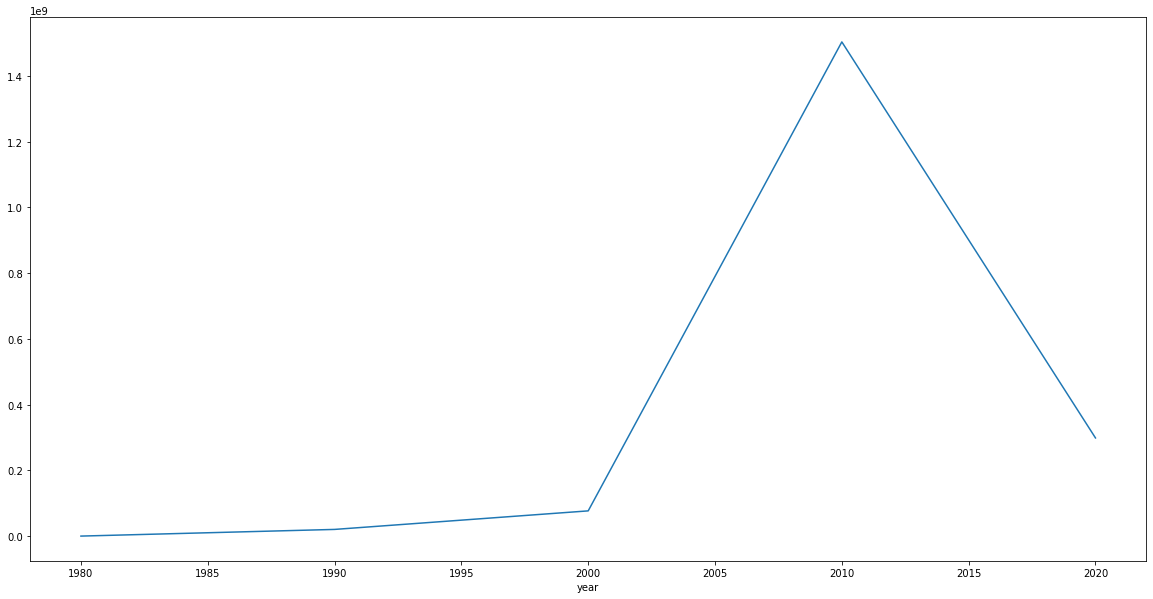

In [60]:
plt.figure(figsize=(20,10))
df.groupby((df.year // 10)*10).sum()['Total spending'].plot()

# From the 2000 we see a sudden upsurge to 2014 where the expenditure was at it's peak at 1.5 billion dollars and then started falling and the lowest is 1980 where it was 65070.00

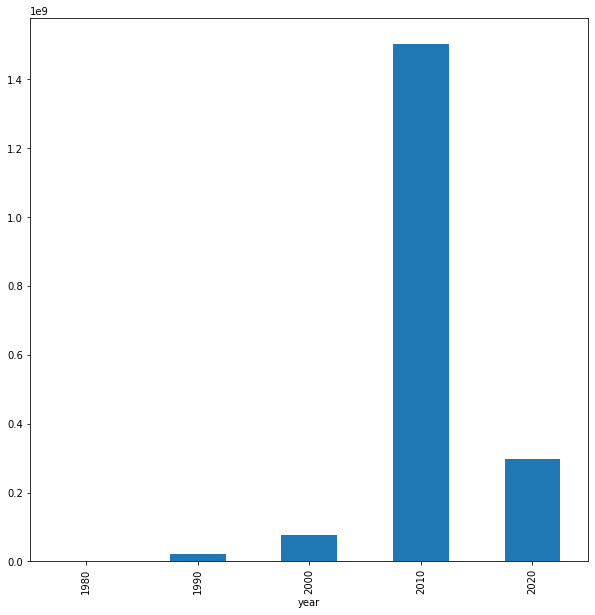

In [61]:
plt.figure(figsize=(10,10))
df.groupby((df.year // 10)*10).sum()['Total spending'].plot(kind = 'bar')
    

In [62]:
df['Total spending'].sum() # 1.8 billion or 189973e+09

1899734223.47

In [65]:
df

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,year,month,day,Total spending
0,AL,ABBEVILLE POLICE DEPT,2540-01-565-4700,BALLISTIC BLANKET KIT,10.0,Kit,15871.59,D,1.0,2018-01-30,2018-01-30,00:00:00,2018,01,30,158715.90
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1.0,Each,245.88,D,1.0,2016-06-02,2016-06-02,00:00:00,2016,06,02,245.88
2,AL,ABBEVILLE POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1.0,Each,658000.00,C,1.0,2016-11-09,2016-11-09,00:00:00,2016,11,09,658000.00
3,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9.0,Each,333.00,D,1.0,2016-09-14,2016-09-14,00:00:00,2016,09,14,2997.00
4,AL,ABBEVILLE POLICE DEPT,5855-01-577-7174,"ILLUMINATOR,INFRARED",10.0,Each,926.00,D,1.0,2017-03-28,2017-03-28,00:00:00,2017,03,28,9260.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130953,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1.0,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,1993,09,01,138.00
130954,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1.0,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,1993,09,01,138.00
130955,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1.0,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,1993,09,01,138.00
130956,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1.0,Each,138.00,D,1.0,1993-09-01,1993-09-01,00:00:00,1993,09,01,138.00


In [221]:
# df.corr('spearman')

In [66]:
# 4. Top 10 items that were brought least and several times during this period (1980-2021) 
# df.groupby('Item Name').count()['Total spending'].reset_index().sort_values(by = 'Total spending', ascending = True)

# Top 10 Least number of items brought
df.groupby('Item Name').count()['Quantity'].nsmallest(10)

Item Name
ABSORBENT PAD,FLUID,MEDICAL          1
ACCESSORY KIT,ANTENNA                1
ACCESSORY KIT,UMBRE                  1
ACCUMULATOR,AIR,TUR                  1
ACOUSTIC SUPPR KIT                   1
ACTUATOR ASSY,POSIT                  1
ACTUATOR,LINEAR                      1
ADAPTER 8-32 THREAD                  1
ADAPTER ANTENNA                      1
ADAPTER ASSEMBLY,INTERFACE DEVICE    1
Name: Quantity, dtype: int64

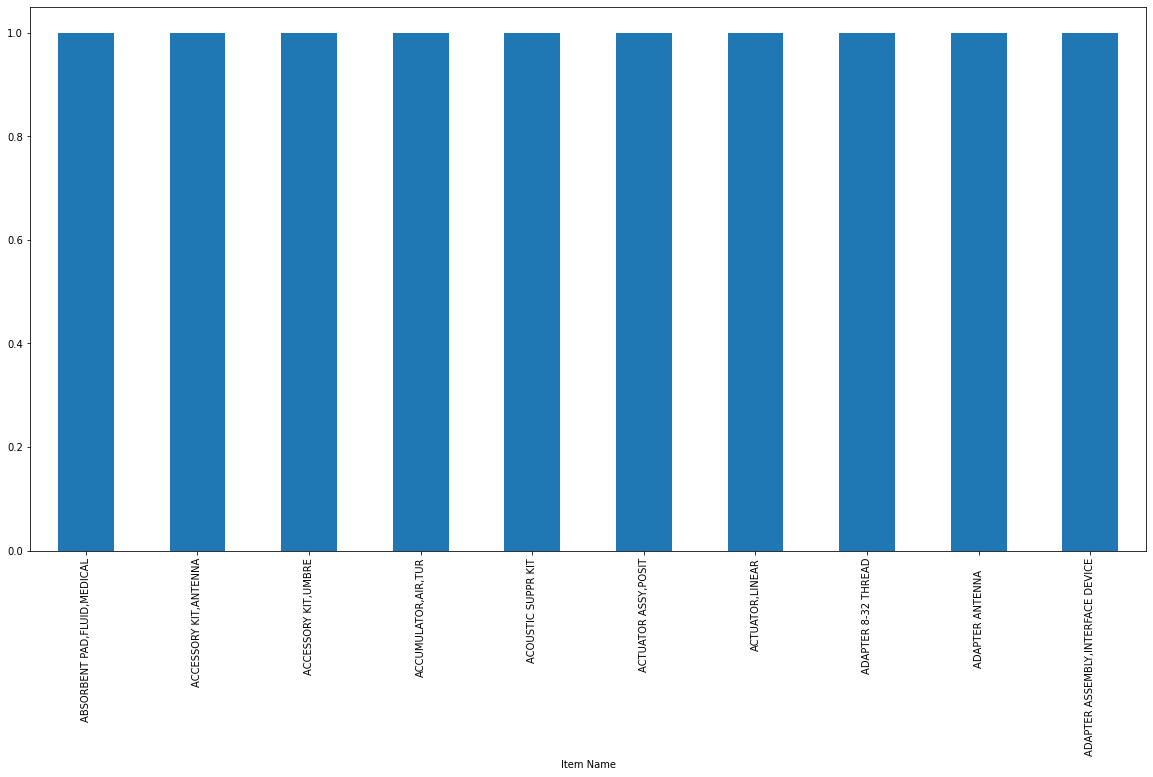

In [67]:
plt.figure(figsize=(20,10))
df.groupby('Item Name').count()['Quantity'].nsmallest(10).plot(kind = 'bar')

In [102]:
# df['Item Name'].count() 

True

In [68]:
# Top 10 highest number of items brought
df.groupby('Item Name').count()['Quantity'].nlargest(10)

Item Name
RIFLE,5.56 MILLIMETER             46843
RIFLE,7.62 MILLIMETER             11146
SIGHT,REFLEX                      10899
PISTOL,CALIBER .45,AUTOMATIC       5664
TRUCK,UTILITY                      2634
ILLUMINATOR,INFRARED               1954
NIGHT VISION GOGGLE                1861
IMAGE INTENSIFIER,NIGHT VISION     1822
VIEWER,NIGHT VISION                1517
SIGHT,THERMAL                      1339
Name: Quantity, dtype: int64

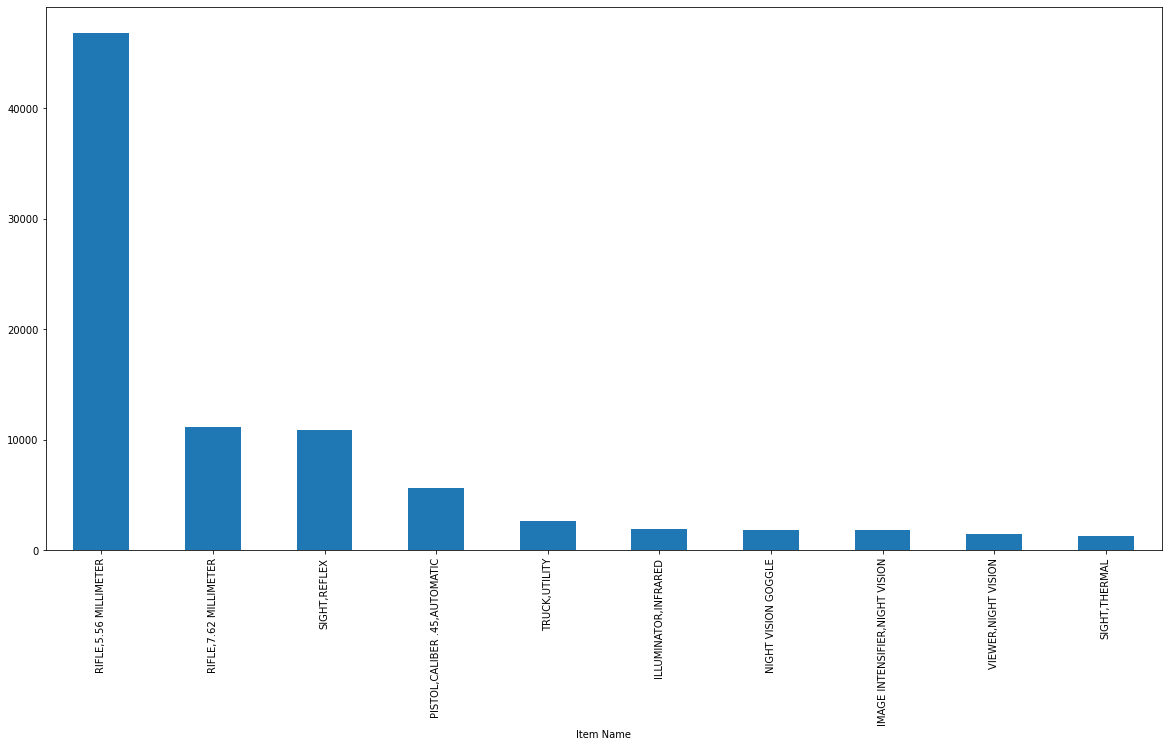

In [69]:
plt.figure(figsize=(20,10))
df.groupby('Item Name').count()['Quantity'].nlargest(10).plot(kind = 'bar')

In [70]:
# 5. Top 10 items that were brought at the lowest and highest price during this period (1980-2021) 
# df.groupby('Item Name').count()['Total spending'].reset_index().sort_values(by = 'Total spending', ascending = True)

# Top 10 lowest Acquisition Value of items 
df2 = df[['Item Name', 'Acquisition Value']] 
df2.nsmallest(10, ['Acquisition Value'])

,Item Name,Acquisition Value
2244,"METEOROLOGICAL STATION,AUTOMATIC",0.0
3964,"LENS,CAMERA,GENERAL PHOTOGRAPHIC",0.0
3971,PLATFORM LIFT,0.0
5123,"GUARD,SHIN",0.0
8994,"GOGGLES,NIGHT VISION",0.0
8995,"GOGGLES,NIGHT VISION",0.0
13929,KEYCARD,0.0
14758,PORTABLE SHOWER 5 G,0.0
14929,"CUP,DISPOSABLE",0.0
20362,"TOOL KIT,ELECTRICIAN'S",0.0


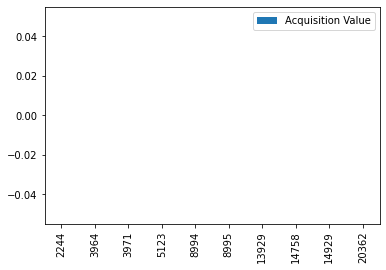

In [71]:
df2.nsmallest(10, ['Acquisition Value']).plot(kind = 'bar') # It shows empty since everything is 0

In [72]:
# Top 10 Highest Acquisition Value of items 
df2 = df[['Item Name', 'Acquisition Value']]
df2.nlargest(10, ['Acquisition Value'])

,Item Name,Acquisition Value
14030,"AIRCRAFT, FIXED WING",22000000.0
6722,"AIRCRAFT, FIXED WING",17000000.0
6724,"AIRCRAFT, FIXED WING",17000000.0
6725,"AIRCRAFT, FIXED WING",17000000.0
26733,"AIRCRAFT, FIXED WING",17000000.0
116194,"AIRCRAFT, FIXED WING",5390000.0
44738,"COMMUN,EQUIP,SOMS-B",5000000.0
87573,"COMMUN,EQUIP,SOMS-B",5000000.0
111698,"COMMUN,EQUIP,SOMS-B",5000000.0
12298,SMALL CRAFT BOAT,4400000.0


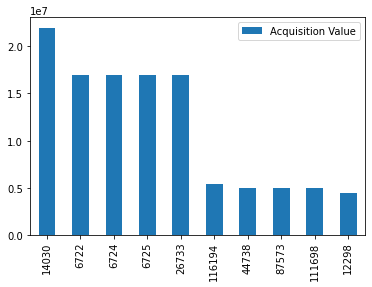

In [73]:
df2.nlargest(10, ['Acquisition Value']).plot(kind = 'bar')

In [74]:
# 6. Top 10 items total purchased (Lowest and Highest) through the period (1980 - 2021) ?

# top 10 lowest total purchased
df2 = df[['Item Name', 'Acquisition Value']]
df2.groupby('Item Name').sum().nsmallest(10, ['Acquisition Value'])

,Acquisition Value
Item Name,
COLLECTIVE MODULAR SUPPORT SYSTEM,0.00
"GUARD,SHIN",0.00
PORTABLE SHOWER 5 G,0.00
"TOOL KIT,POWER,CORDLESS",0.00
O-RING,0.35
"WEBBING,TEXTILE",0.47
"NUT,PLAIN,CONE SEAT,HEXAGON",0.58
"WEIGHT,WHEEL BALANCING",0.76
SCREW,0.83


<Figure size 720x360 with 0 Axes>

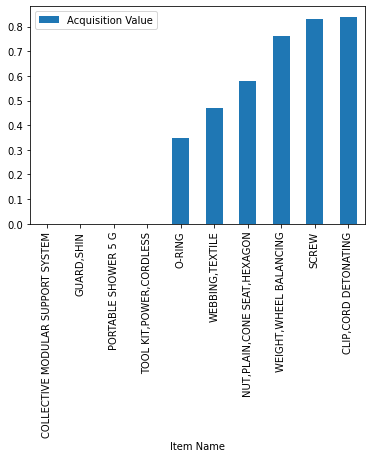

In [76]:
plt.figure(figsize=(10,5))
df2.groupby('Item Name').sum().nsmallest(10, ['Acquisition Value']).plot(kind = 'bar')

In [218]:
# top 10 highest total purchased
df2 = df[['Item Name', 'Acquisition Value', 'Quantity']]
df2.groupby('Item Name').sum().nlargest(10, ['Acquisition Value'])

,Acquisition Value,Quantity
Item Name,,
MINE RESISTANT VEHICLE,7.743062e+08,1141.0
"TRUCK,UTILITY",1.864980e+08,2637.0
"AIRCRAFT, FIXED WING",9.873600e+07,13.0
"UNMANNED VEHICLE,GROUND",7.386382e+07,816.0
"HELICOPTER,UTILITY",4.058638e+07,44.0
"HELICOPTER,OBSERVATION",3.324537e+07,271.0
MK3MOD0,2.378752e+07,64.0
"IMAGE INTENSIFIER,NIGHT VISION",2.356367e+07,3226.0
ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED VEHICLES,2.320089e+07,87.0


<Figure size 720x576 with 0 Axes>

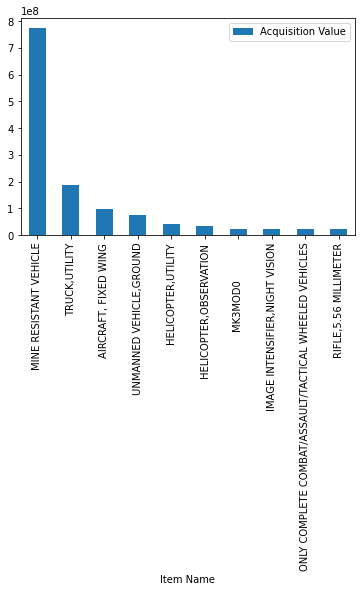

In [78]:
plt.figure(figsize=(10,8))
df2.groupby('Item Name').sum().nlargest(10, ['Acquisition Value']).plot(kind = 'bar')

In [79]:
# 7. Most Shipped Date

df.groupby('Ship Date').count()['State'].nlargest(10)

Ship Date
2012-01-17    1205
2017-09-18    1134
2013-09-19     828
2014-07-15     730
2012-04-26     599
2002-10-15     593
2011-11-14     553
2014-08-27     494
2014-11-13     480
1997-08-23     477
Name: State, dtype: int64

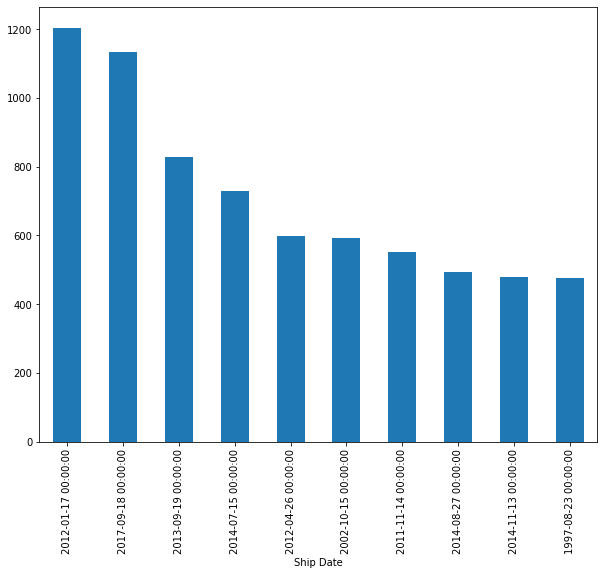

In [80]:
plt.figure(figsize=(10,8))
df.groupby('Ship Date').count()['State'].nlargest(10).plot(kind = 'bar')

In [83]:
# 8. Most Shipped year
df.groupby('year').count()['Quantity'].nlargest(10)

year
2012    15648
2021    11786
2011    11521
2020    10026
2014     9396
2013     6702
2017     5341
2002     5307
2010     4535
2016     4342
Name: Quantity, dtype: int64

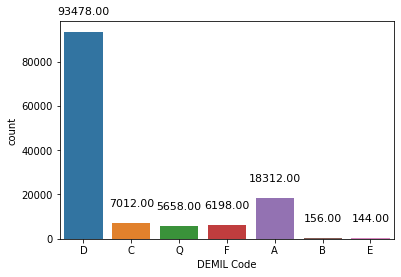

In [227]:
# Most of the items we classified as D which implies to destroy the item to prevent restoration
# and then A for imposing licensing
ax = sns.countplot(x = 'DEMIL Code', data = df)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
    
# A : imposing licensing for certain destinations
# B : Destroying to an extent that the equipment is used for scraping purpose
# C : remove and dematerailze key points
# D : destroy the item to prevent restoration
# E : reserve for exclusive use
# F : special demil instructions
# Q : Destroying to an extent that the equipment is used for scraping purpose outside US

In [210]:
# 9. Highest acqusition item spent by a state in each decade
df2 = df[['State', 'year', 'Total spending', 'Item Name' ]]
# df2['State'].groupby((df2.year // 10)*10)
df2.loc[df2.groupby((df2.year // 10)*10)["Total spending"].idxmax()] # (1980-1989, 1990-1999, 2000-2009, 2010-2019, 2020-2021)

,State,year,Total spending,Item Name
79853,NY,1980,65070.0,"TRUCK,ARMORED"
28806,FL,1997,922704.0,"HELICOPTER,UTILITY"
12298,CA,2005,4400000.0,SMALL CRAFT BOAT
14030,CA,2016,22000000.0,"AIRCRAFT, FIXED WING"
9142,AZ,2020,1840000.0,MAINTENANCE FACILITY CONTAINERIZED


In [215]:
# 10. Highest acqusition item spent by a state in each year

df2.loc[df2.groupby('year')["Total spending"].idxmax()] 

,State,year,Total spending,Item Name
79853,NY,1980,65070.0,"TRUCK,ARMORED"
73322,MT,1990,138.0,"RIFLE,7.62 MILLIMETER"
70635,MO,1991,138.0,"RIFLE,7.62 MILLIMETER"
8673,AZ,1992,2420.6,SIGHT
130773,WY,1993,499.0,"RIFLE,5.56 MILLIMETER"
33173,GA,1994,98162.0,"TRUCK,TANK"
40193,IL,1995,460000.0,ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED ...
80267,NY,1996,749045.0,"AIRPLANE,CARGO-TRANSPORT"
28806,FL,1997,922704.0,"HELICOPTER,UTILITY"
36514,ID,1998,800865.0,"AIRPLANE,CARGO-TRANSPORT"


In [240]:
# 11. Top 5 Highest and Lowest expenditure among the states and agencies in USA ?

# Top 5 Highest
df.groupby(['State','Agency Name']).sum()['Total spending'].nlargest(5)

State  Agency Name                  
AZ     ARIZONA DEPT OF PUBLIC SAFETY    52594669.90
CA     HIGHWAY PATROL                   22371680.00
FL     DEPT OF LAW ENF TALLAHASSEE      20952245.69
SC     LAW ENFORCEMENT DIVISION         19855979.32
TX     HOUSTON POLICE DEPT              10823252.81
Name: Total spending, dtype: float64

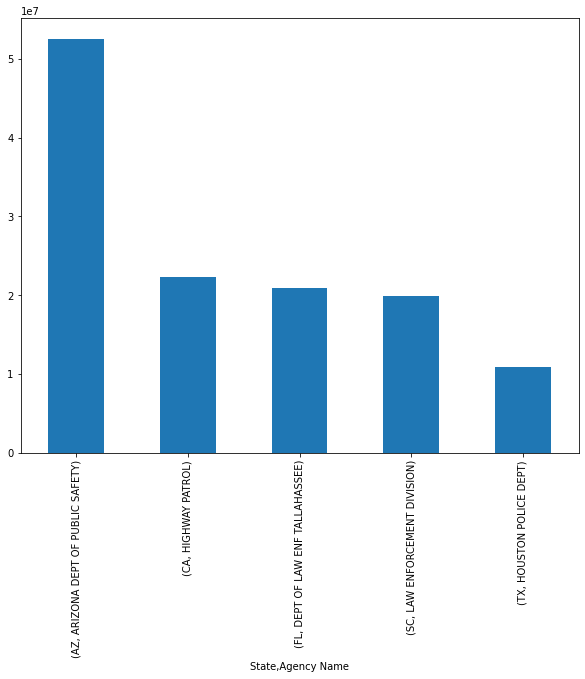

In [236]:
plt.figure(figsize=(10,8))
df.groupby(['State','Agency Name']).sum()['Total spending'].nlargest(5).plot(kind = 'bar')


In [241]:
# Top 5 Lowest
df.groupby(['State','Agency Name']).sum()['Total spending'].nsmallest(5)

State  Agency Name                        
PA     SHAMOKIN POLICE DEPT                   28.00
GA     BERLIN POLICE DEPT                     58.71
NM     CIMARRON POLICE DEPT                   60.60
MA     WORCESTER POLICE DEPT                  79.11
KY     JUNCTION CITY POLICE DEPT              81.09
Name: Total spending, dtype: float64

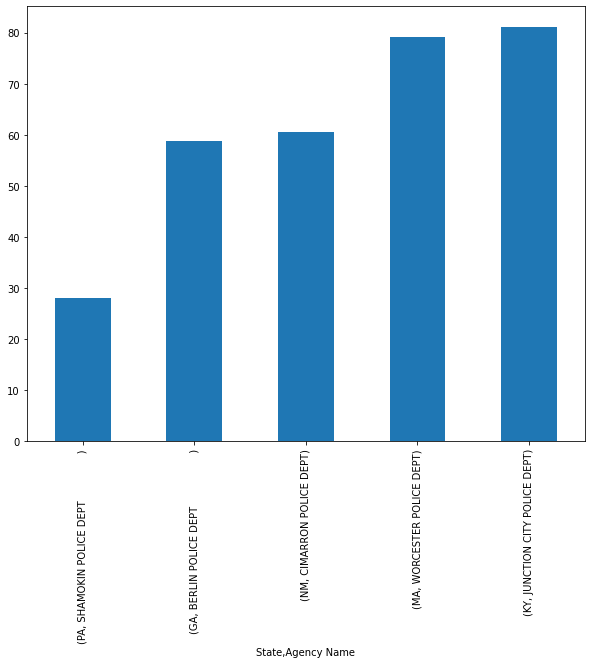

In [242]:
plt.figure(figsize=(10,8))
df.groupby(['State','Agency Name']).sum()['Total spending'].nsmallest(5).plot(kind = 'bar')


In [284]:
# 12. Top 5 Highest and Lowest expenditure among the DEMIL Code  in USA ? 

# Top 5 Highest
df.groupby(['DEMIL Code','Item Name']).sum()['Total spending'].nlargest(5)

DEMIL Code  Item Name              
C           MINE RESISTANT VEHICLE     7.242213e+08
            TRUCK,UTILITY              1.813147e+08
            AIRCRAFT, FIXED WING       9.849900e+07
Q           UNMANNED VEHICLE,GROUND    7.248551e+07
D           MINE RESISTANT VEHICLE     5.008489e+07
Name: Total spending, dtype: float64

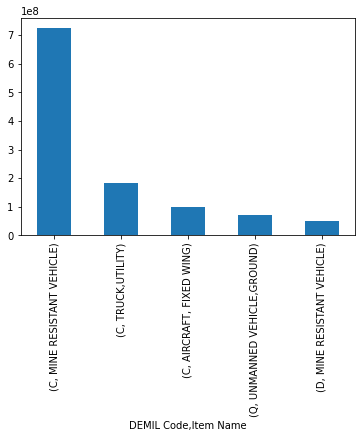

In [285]:
df.groupby(['DEMIL Code','Item Name']).sum()['Total spending'].nlargest(5).plot(kind = 'bar')

In [286]:
# Top 5 Lowest
df.groupby(['DEMIL Code','Item Name']).sum()['Total spending'].nsmallest(5)

DEMIL Code  Item Name                        
A           COLLECTIVE MODULAR SUPPORT SYSTEM    0.0
            GUARD,SHIN                           0.0
            METEOROLOGICAL STATION,AUTOMATIC     0.0
            PORTABLE SHOWER 5 G                  0.0
            TOOL KIT,POWER,CORDLESS              0.0
Name: Total spending, dtype: float64

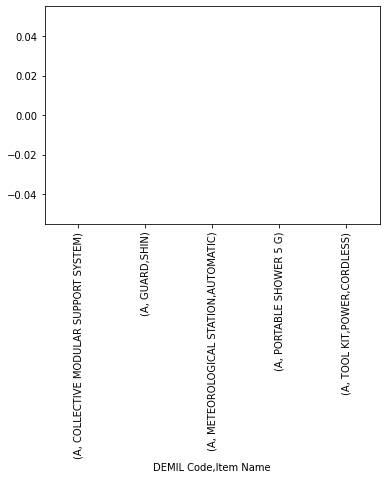

In [287]:
df.groupby(['DEMIL Code','Item Name']).sum()['Total spending'].nsmallest(5).plot(kind = 'bar') # It is empty since all the values are 0

In [289]:
# 13. Top 5 Highest and Lowest expenditure among the DEMIL IC in USA ? 

# 0.0 - Demil code reviewed and Demil code not equal
# 1.0 - Demil code reviewed and no Demil code change recommended
# 3.0 - Requires mutilation
# 4.0 - Demil code could not be validated
# 5.0 - Item reviewed and coded review/collaboration cycle
# 6.0 - Requires mutilation overseas
# 7.0 - Failed to update the DEMIL code




# Top 5 Highest
df.groupby(['DEMIL IC','Item Name']).sum()['Total spending'].nlargest(5)

DEMIL IC  Item Name              
1.0       MINE RESISTANT VEHICLE     7.735962e+08
          TRUCK,UTILITY              1.803480e+08
          AIRCRAFT, FIXED WING       9.873600e+07
3.0       UNMANNED VEHICLE,GROUND    7.248551e+07
1.0       HELICOPTER,UTILITY         3.875357e+07
Name: Total spending, dtype: float64

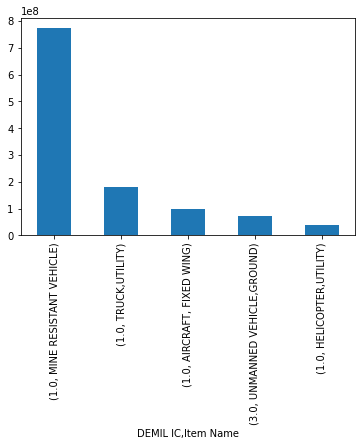

In [290]:
df.groupby(['DEMIL IC','Item Name']).sum()['Total spending'].nlargest(5).plot(kind = 'bar')

In [291]:
# Top 5 Lowest
df.groupby(['DEMIL IC','Item Name']).sum()['Total spending'].nsmallest(5)

DEMIL IC  Item Name                        
1.0       COLLECTIVE MODULAR SUPPORT SYSTEM    0.0
          GUARD,SHIN                           0.0
          METEOROLOGICAL STATION,AUTOMATIC     0.0
          PORTABLE SHOWER 5 G                  0.0
          TOOL KIT,POWER,CORDLESS              0.0
Name: Total spending, dtype: float64

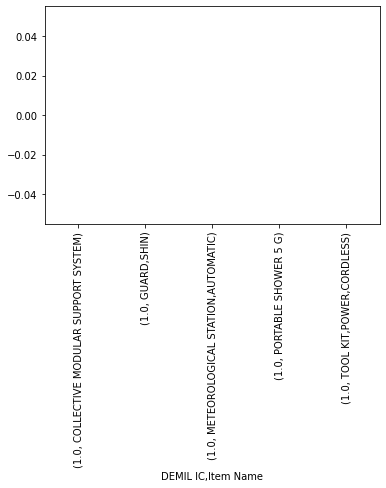

In [292]:
df.groupby(['DEMIL IC','Item Name']).sum()['Total spending'].nsmallest(5).plot(kind = 'bar')

In [294]:
df.groupby('DEMIL IC').count()

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,Ship Date,Dates,Time,year,month,day,Total spending,n1,n2,n3,n4
DEMIL IC,,,,,,,,,,,,,,,,,,,
0.0,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
1.0,122354,122354,122354,122354,122354,122354,122354,122354,122354,122354,122354,122354,122354,122354,122354,122354,122354,122354,122354
3.0,5406,5406,5406,5406,5406,5406,5406,5406,5406,5406,5406,5406,5406,5406,5406,5406,5406,5406,5406
4.0,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
5.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6.0,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250
7.0,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891


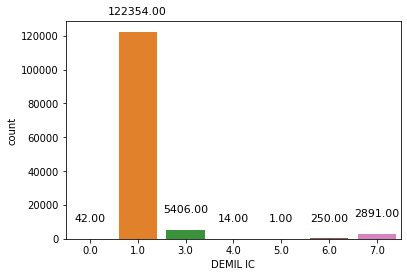

In [225]:
ax = sns.countplot(x = 'DEMIL IC', data = df)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')

In [226]:
df['DEMIL IC'].count()

130958

In [180]:
df.groupby(['DEMIL Code', 'year']).count()

State  Agency Name  NSN  Item Name  ...   n1   n2   n3   n4
DEMIL Code year                                      ...                    
A          2011      1            1    1          1  ...    1    1    1    1
           2012      3            3    3          3  ...    3    3    3    3
           2013      6            6    6          6  ...    6    6    6    6
           2014      2            2    2          2  ...    2    2    2    2
           2015      2            2    2          2  ...    2    2    2    2
...                ...          ...  ...        ...  ...  ...  ...  ...  ...
Q          2017    860          860  860        860  ...  860  860  860  860
           2018    335          335  335        335  ...  335  335  335  335
           2019    310          310  310        310  ...  310  310  310  310
           2020    267          267  267        267  ...  267  267  267  267
           2021    580          580  580        580  ...  580  580  580  580

[144 rows x 18 columns]

In [181]:
df[df['DEMIL Code'] == 'A'].groupby('year').count()

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,month,day,Total spending,n1,n2,n3,n4
year,,,,,,,,,,,,,,,,,,,
2011,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2012,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2013,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2014,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2015,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2017,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2018,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2019,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2020,8089,8089,8089,8089,8089,8089,8089,8089,8089,8089,8089,8089,8089,8089,8089,8089,8089,8089,8089


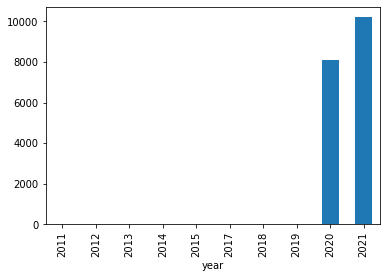

In [183]:
df[df['DEMIL Code'] == 'A'].groupby('year').count()['State'].plot(kind = 'bar')

In [184]:
df[df['DEMIL Code'] == 'B'].groupby('year').count()['State']

year
2005     1
2007     3
2009     2
2010     6
2011    28
2012    33
2013    13
2014     2
2015     5
2016     3
2017     3
2018     4
2019     7
2020     7
2021    39
Name: State, dtype: int64

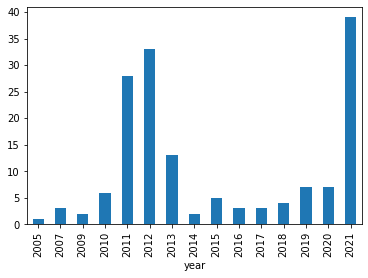

In [186]:
df[df['DEMIL Code'] == 'B'].groupby('year').count()['State'].plot(kind = 'bar')

In [187]:
df[df['DEMIL Code'] == 'C'].groupby('year').count()['State']

year
1980       1
1994       4
1995      23
1996      27
1997      26
1998      11
1999      14
2000      41
2001      15
2002       8
2003      12
2004      18
2005      22
2006      64
2007      50
2008     232
2009      59
2010     218
2011     530
2012     865
2013     891
2014    1177
2015     427
2016     488
2017     458
2018     380
2019     524
2020     235
2021     192
Name: State, dtype: int64

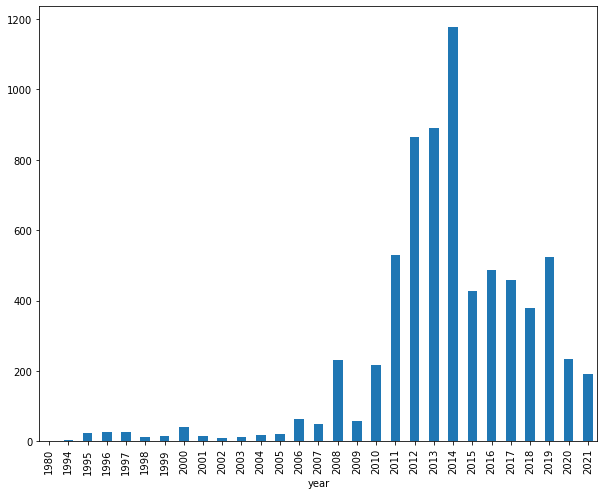

In [189]:
plt.figure(figsize=(10,8))
df[df['DEMIL Code'] == 'C'].groupby('year').count()['State'].plot(kind = 'bar')

In [190]:
df[df['DEMIL Code'] == 'D'].groupby('year').count()['State']

year
1990      167
1991       73
1993      466
1994     1081
1995     1007
1996     1388
1997     1711
1998     3519
1999     2178
2000     2265
2001      681
2002     5288
2003     4044
2004     3190
2005     3581
2006     3046
2007     1681
2008     2171
2009     1959
2010     4089
2011    10148
2012    13394
2013     4732
2014     7119
2015     2827
2016     2552
2017     3446
2018     2371
2019     1527
2020     1129
2021      648
Name: State, dtype: int64

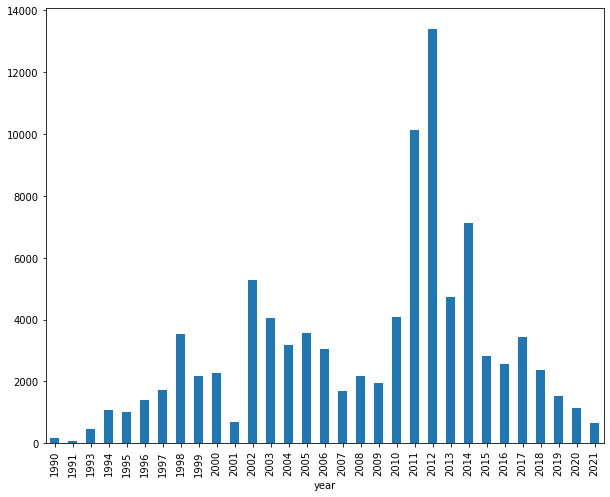

In [192]:
plt.figure(figsize=(10,8))
df[df['DEMIL Code'] == 'D'].groupby('year').count()['State'].plot(kind = 'bar')

In [193]:
df[df['DEMIL Code'] == 'E'].groupby('year').count()['State']

year
2009     3
2010     7
2011    20
2012    61
2013     8
2014    22
2015     5
2019     4
2020    14
Name: State, dtype: int64

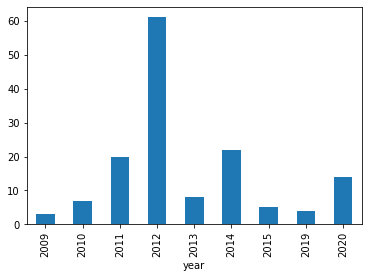

In [194]:
df[df['DEMIL Code'] == 'E'].groupby('year').count()['State'].plot(kind = 'bar')

In [220]:
df[df['DEMIL Code'] == 'F'].groupby('year').count()['State']

year
1992      3
1994     19
1995     17
1996     36
1997     33
1998     78
1999     15
2000     12
2001     42
2002     11
2003     11
2004     12
2005     28
2006     24
2007     22
2008     10
2009     36
2010     61
2011    314
2012    809
2013    675
2014    504
2015    461
2016    632
2017    572
2018    570
2019    782
2020    285
2021    124
Name: State, dtype: int64

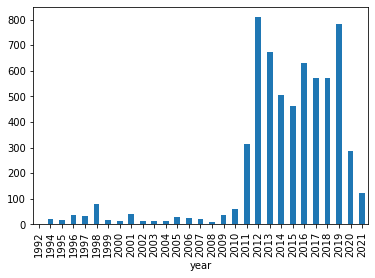

In [221]:
df[df['DEMIL Code'] == 'F'].groupby('year').count()['State'].plot(kind = 'bar')

In [195]:
df[df['DEMIL Code'] == 'Q'].groupby('year').count()['State']

year
1996      1
1998      1
1999      1
2000      2
2005      2
2006      3
2007      3
2008      3
2009     45
2010    154
2011    480
2012    483
2013    377
2014    570
2015    514
2016    667
2017    860
2018    335
2019    310
2020    267
2021    580
Name: State, dtype: int64

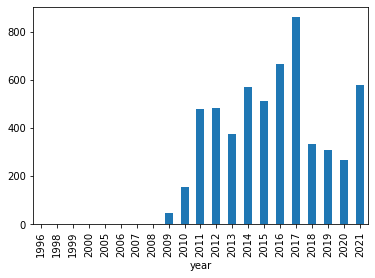

In [219]:
df[df['DEMIL Code'] == 'Q'].groupby('year').count()['State'].plot(kind = 'bar')

In [ ]:
# df['year'] = df['year'].astype(object)
a = df.groupby((df.year // 10)*10).count().index

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130958 entries, 0 to 130957
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   State              130958 non-null  object        
 1   Agency Name        130958 non-null  object        
 2   NSN                130958 non-null  object        
 3   Item Name          130958 non-null  object        
 4   Quantity           130958 non-null  int64         
 5   UI                 130958 non-null  object        
 6   Acquisition Value  130958 non-null  float64       
 7   DEMIL Code         130958 non-null  object        
 8   DEMIL IC           130958 non-null  float64       
 9   Ship Date          130958 non-null  datetime64[ns]
 10  Dates              130958 non-null  object        
 11  Time               130958 non-null  object        
 12  year               130958 non-null  object        
 13  month              130958 non-null  object  

In [ ]:
df.groupby((df.year // 10)*10).sum().index

Int64Index([1980, 1990, 2000, 2010, 2020], dtype='int64', name='year')

In [ ]:
df.groupby((df.year // 10)*10).sum()

,Quantity,Acquisition Value,DEMIL IC,Total spending
year,,,,
1980,1,6.507000e+04,1.0,6.507000e+04
1990,11990,2.016647e+07,11917.0,2.037046e+07
2000,32366,7.115072e+07,28964.0,7.677947e+07
2010,262271,1.384521e+09,92680.0,1.503786e+09
2020,240807,2.475344e+08,26808.0,2.987331e+08


In [ ]:
df.groupby(df.year).sum()

,Quantity,Acquisition Value,DEMIL IC,Total spending
year,,,,
1980,1,6.507000e+04,1.0,6.507000e+04
1990,167,2.304600e+04,167.0,2.304600e+04
1991,73,1.007400e+04,73.0,1.007400e+04
1992,3,7.261800e+03,3.0,7.261800e+03
1993,466,6.611300e+04,466.0,6.611300e+04
1994,1104,7.490500e+05,1104.0,7.490500e+05
1995,1050,2.476557e+06,1047.0,2.484815e+06
1996,1526,4.559091e+06,1457.0,4.751491e+06
1997,1770,5.428881e+06,1776.0,5.428881e+06


In [ ]:
df2 = df.copy()
df2= df2.set_index('Ship Date')
# df2=df2.resample('10AS').sum()

In [ ]:
# This shows that in 1980, the only item bought was TRUCK,ARMORED and only 1 was bought for the price of $65070
df[df['year'] == 1980].groupby(['Item Name', 'Acquisition Value']).count()

,,State,Agency Name,NSN,Quantity,UI,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,year,month,day,Total spending
Item Name,Acquisition Value,,,,,,,,,,,,,,
"TRUCK,ARMORED",65070.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# This shows that in 1990, the only item bought was RIFLE,7.62 MILLIMETER of 167 in quantity for the price of $138 each
df[df['year'] == 1990].groupby(['Item Name', 'Acquisition Value']).count()

,,State,Agency Name,NSN,Quantity,UI,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,year,month,day,Total spending
Item Name,Acquisition Value,,,,,,,,,,,,,,
"RIFLE,7.62 MILLIMETER",138.0,167,167,167,167,167,167,167,167,167,167,167,167,167,167


In [ ]:
# This shows that in 1991, the only item bought was RIFLE,7.62 MILLIMETER of 73 in quantity for the price of $138 each 
df[df['year'] == 1991].groupby(['Item Name', 'Acquisition Value']).count()

,,State,Agency Name,NSN,Quantity,UI,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,year,month,day,Total spending
Item Name,Acquisition Value,,,,,,,,,,,,,,
"RIFLE,7.62 MILLIMETER",138.0,73,73,73,73,73,73,73,73,73,73,73,73,73,73


In [ ]:
# This shows that in 1992, the only item bought was SIGHT of 3 in quantity for the price of $2420.6 each 
df[df['year'] == 1992].groupby(['Item Name', 'Acquisition Value']).count()

,,State,Agency Name,NSN,Quantity,UI,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,year,month,day,Total spending
Item Name,Acquisition Value,,,,,,,,,,,,,,
SIGHT,2420.6,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
# This shows that in 1993, there were two items bought which are RIFLE,5.56 MILLIMETER and RIFLE,7.62 MILLIMETER 
# of 5 and 461 in quantity respectively and each of them were having a price of $499 and $138 respectively.
df[df['year'] == 1993].groupby(['Item Name', 'Acquisition Value']).count()

,,State,Agency Name,NSN,Quantity,UI,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,year,month,day,Total spending
Item Name,Acquisition Value,,,,,,,,,,,,,,
"RIFLE,5.56 MILLIMETER",499.0,5,5,5,5,5,5,5,5,5,5,5,5,5,5
"RIFLE,7.62 MILLIMETER",138.0,461,461,461,461,461,461,461,461,461,461,461,461,461,461


In [ ]:
# df[(df['Item Name'] == 'NIGHT VISION GOGGLE') & (df['year'] == 1994)].groupby('Acquisition Value').count()
# This shows that in 1994, there were seven items bought which 
# Item Name - Quantity -- Price
# 1. CAR,ARMORED - 1 -- $33707.00
# 2. IMAGE INTENSIFIER TUBE,NIGHT VISION - 15 -- 12789.00
# 3. NIGHT VISION GOGGLE - 2 -- 7621.00 & 4300.00 (One was priced at 7621.00 and the other at 4300.00)
# 4. RIFLE,7.62 MILLIMETER - 1080 -- $138.00
# 5. TRUCK,ARMORED - 4 -- $65070.0
# 6. TRUCK,TANK - 1 -- $98162.00
# 7. VIEWER,NIGHT VISION - 1 -- $4105.00

df[df['year'] == 1994].groupby(['Item Name', 'Acquisition Value']).count()

State  Agency Name  \
Item Name                           Acquisition Value                       
CAR,ARMORED                         33707.0                1            1   
IMAGE INTENSIFIER TUBE,NIGHT VISION 12789.0               15           15   
NIGHT VISION GOGGLE                 4300.0                 1            1   
                                    7621.0                 1            1   
RIFLE,7.62 MILLIMETER               138.0               1080         1080   
TRUCK,ARMORED                       65070.0                4            4   
TRUCK,TANK                          98162.0                1            1   
VIEWER,NIGHT VISION                 4105.0                 1            1   

                                                        NSN  Quantity    UI  \
Item Name                           Acquisition Value                         
CAR,ARMORED                         33707.0               1         1     1   
IMAGE INTENSIFIER TUBE,NIGHT VISION 12789.0              15        15    15   
NIGHT VISION GOGGLE                 4300.0                1         1     1   
                                    7621.0                1         1     1   
RIFLE,7.62 MILLIMETER               138.0              1080      1080  1080   
TRUCK,ARMORED                       65070.0               4         4     4   
TRUCK,TANK                          98162.0               1         1     1   
VIEWER,NIGHT VISION                 4105.0                1         1     1   

                                                       DEMIL Code  DEMIL IC  \
Item Name                           Acquisition Value                         
CAR,ARMORED                         33707.0                     1         1   
IMAGE INTENSIFIER TUBE,NIGHT VISION 12789.0                    15        15   
NIGHT VISION GOGGLE                 4300.0                      1         1   
                                    7621.0                      1         1   
RIFLE,7.62 MILLIMETER               138.0                    1080      1080   
TRUCK,ARMORED                       65070.0                     4         4   
TRUCK,TANK                          98162.0                     1         1   
VIEWER,NIGHT VISION                 4105.0                      1         1   

                                                       Ship Date  Dates  Time  \
Item Name                           Acquisition Value                           
CAR,ARMORED                         33707.0                    1      1     1   
IMAGE INTENSIFIER TUBE,NIGHT VISION 12789.0                   15     15    15   
NIGHT VISION GOGGLE                 4300.0                     1      1     1   
                                    7621.0                     1      1     1   
RIFLE,7.62 MILLIMETER               138.0                   1080   1080  1080   
TRUCK,ARMORED                       65070.0                    4      4     4   
TRUCK,TANK                          98162.0                    1      1     1   
VIEWER,NIGHT VISION                 4105.0                     1      1     1   

                                                       year  month   day  \
Item Name                           Acquisition Value                      
CAR,ARMORED                         33707.0               1      1     1   
IMAGE INTENSIFIER TUBE,NIGHT VISION 12789.0              15     15    15   
NIGHT VISION GOGGLE                 4300.0                1      1     1   
                                    7621.0                1      1     1   
RIFLE,7.62 MILLIMETER               138.0              1080   1080  1080   
TRUCK,ARMORED                       65070.0               4      4     4   
TRUCK,TANK                          98162.0               1      1     1   
VIEWER,NIGHT VISION                 4105.0                1      1     1   

                                                       Total spending  
Item Name                           Acquisition Value     

In [ ]:
# This shows that in 1995, there were 15 items bought which 
# Item Name - Quantity 
# 1. HELICOPTER,OBSERVATION - 5 
# 2. NIGHT VISION GOGGLE - 3 
# 3. NIGHT VISION SIGHT - 9 
# 4. NIGHT VISION SIGHT INDIVIDUAL SERVED WEAPONS - 1
# 5. NIGHT VISION SIGHT, - 6 
# 6. ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED VEHICLES - 1 
# 7. RIFLE,5.56 MILLIMETER - 407 
# 8. RIFLE,7.62 MILLIMETER - 572 
# 9. SHOTGUN,12 GAGE,RIOT TYPE - 27 
# 10. SIGHT,NIGHT VISION - 2 
# 11. TRUCK,ARMORED - 9 
# 12. TRUCK,TANK - 1 
# 13. TRUCK,UTILITY - 1 
# 14. VIEWER,NIGHT VISION - 1 
# 15. VIEWING SET,INFRARE - 2 


# So from the below table, the we have the item name column which display the item's name, then we Acquisition Value 
# which shows two different values and there respective quantity for the said price for the same item.
# For example, item HELICOPTER,OBSERVATION has two Acquisition Value that were bought at 92290.00 for 1 in quantity and
# at 190817.00 for 4 in quantity and thats how the other items are sorted

df[df['year'] == 1995].groupby(['Item Name', 'Acquisition Value']).count()

State  \
Item Name                                          Acquisition Value          
HELICOPTER,OBSERVATION                             92290.00               1   
                                                   190817.00              4   
NIGHT VISION GOGGLE                                3578.00                2   
                                                   4300.00                1   
NIGHT VISION SIGHT                                 2208.00                3   
                                                   4379.62                2   
                                                   6446.00                4   
NIGHT VISION SIGHT INDIVIDUAL SERVED WEAPONS       5650.00                1   
NIGHT VISION SIGHT,                                2350.00                4   
                                                   19000.00               2   
ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED V... 460000.00              1   
RIFLE,5.56 MILLIMETER                              499.00               407   
RIFLE,7.62 MILLIMETER                              138.00               557   
                                                   1278.00               15   
SHOTGUN,12 GAGE,RIOT TYPE                          108.00                27   
SIGHT,NIGHT VISION                                 5029.00                2   
TRUCK,ARMORED                                      65070.00               9   
TRUCK,TANK                                         98162.00               1   
TRUCK,UTILITY                                      49897.00               1   
VIEWER,NIGHT VISION                                4105.00                1   
VIEWING SET,INFRARE                                2600.00                1   
                                                   2829.00                1   

                                                                      Agency Name  \
Item Name                                          Acquisition Value                
HELICOPTER,OBSERVATION                             92290.00                     1   
                                                   190817.00                    4   
NIGHT VISION GOGGLE                                3578.00                      2   
                                                   4300.00                      1   
NIGHT VISION SIGHT                                 2208.00                      3   
                                                   4379.62                      2   
                                                   6446.00                      4   
NIGHT VISION SIGHT INDIVIDUAL SERVED WEAPONS       5650.00                      1   
NIGHT VISION SIGHT,                                2350.00                      4   
                                                   19000.00                     2   
ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED V... 460000.00                    1   
RIFLE,5.56 MILLIMETER                              499.00                     407   
RIFLE,7.62 MILLIMETER                              138.00                     557   
                                                   1278.00                     15   
SHOTGUN,12 GAGE,RIOT TYPE                          108.00                      27   
SIGHT,NIGHT VISION                                 5029.00                      2   
TRUCK,ARMORED                                      65070.00                     9   
TRUCK,TANK                                         98162.00                     1   
TRUCK,UTILITY                                      49897.00                     1   
VIEWER,NIGHT VISION                                4105.00                      1   
VIEWING SET,INFRARE                                2600.00                      1   
                                                   2829.00                      1   

                                                                      NSN  \
Item Name                                          Acqu

In [ ]:
# This shows that in 1996, there were 9 items bought 
# So from the below table, the we have the item name column which display the item's name, then we Acquisition Value 
# which shows two different values and there respective quantity for the said price for the same item.

df[df['year'] == 1996].groupby(['Item Name', 'Acquisition Value']).count()

State  Agency Name  \
Item Name                               Acquisition Value                       
AIRPLANE,CARGO-TRANSPORT                749045.0               1            1   
AVIATORS NIGHT VISI                     14869.0               36           36   
HELICOPTER,OBSERVATION                  92290.0               15           15   
                                        159398.0               3            3   
                                        190817.0               3            3   
NIGHT VISION EQUIP, EMIT, REFLECTED RAD 985.0                  2            2   
                                        1050.0                 2            2   
RIFLE,5.56 MILLIMETER                   499.0                795          795   
RIFLE,7.62 MILLIMETER                   138.0                450          450   
                                        1278.0                29           29   
SHOTGUN,12 GAGE,RIOT TYPE               108.0                110          110   
TRUCK,ARMORED                           65070.0                5            5   
VIEWING SET,INFRARE                     2600.0                 1            1   

                                                           NSN  Quantity   UI  \
Item Name                               Acquisition Value                       
AIRPLANE,CARGO-TRANSPORT                749045.0             1         1    1   
AVIATORS NIGHT VISI                     14869.0             36        36   36   
HELICOPTER,OBSERVATION                  92290.0             15        15   15   
                                        159398.0             3         3    3   
                                        190817.0             3         3    3   
NIGHT VISION EQUIP, EMIT, REFLECTED RAD 985.0                2         2    2   
                                        1050.0               2         2    2   
RIFLE,5.56 MILLIMETER                   499.0              795       795  795   
RIFLE,7.62 MILLIMETER                   138.0              450       450  450   
                                        1278.0              29        29   29   
SHOTGUN,12 GAGE,RIOT TYPE               108.0              110       110  110   
TRUCK,ARMORED                           65070.0              5         5    5   
VIEWING SET,INFRARE                     2600.0               1         1    1   

                                                           DEMIL Code  \
Item Name                               Acquisition Value               
AIRPLANE,CARGO-TRANSPORT                749045.0                    1   
AVIATORS NIGHT VISI                     14869.0                    36   
HELICOPTER,OBSERVATION                  92290.0                    15   
                                        159398.0                    3   
                                        190817.0                    3   
NIGHT VISION EQUIP, EMIT, REFLECTED RAD 985.0                       2   
                                        1050.0                      2   
RIFLE,5.56 MILLIMETER                   499.0                     795   
RIFLE,7.62 MILLIMETER                   138.0                     450   
                                        1278.0                     29   
SHOTGUN,12 GAGE,RIOT TYPE               108.0                     110   
TRUCK,ARMORED                           65070.0                     5   
VIEWING SET,INFRARE                     2600.0                      1   

                                                           DEMIL IC  \
Item Name                               Acquisition Value             
AIRPLANE,CARGO-TRANSPORT                749045.0                  1   
AVIATORS NIGHT VISI                     14869.0                  36   
HELICOPTER,OBSERVATION                  92290.0                  15   
                                        159398.0                  3   
                                        190817.0                  3   
NIGHT VISION EQUIP, EMIT, REFLECTE

In [ ]:
# This shows that in 1997, there were 11 items bought 
# So from the below table, the we have the item name column which display the item's name, then we Acquisition Value 
# which shows two different values and there respective quantity for the said price for the same item.

df[df['year'] == 1997].groupby(['Item Name', 'Acquisition Value']).count()

State  Agency Name   NSN  \
Item Name                    Acquisition Value                             
HELICOPTER,OBSERVATION       92290.00              11           11    11   
HELICOPTER,UTILITY           922704.00              3            3     3   
LENS,INFRARED RECEIVER       940.78                 1            1     1   
NIGHT VISION GOGGLE          4300.00               32           32    32   
PISTOL,CALIBER .45,AUTOMATIC 58.71                 22           22    22   
RIFLE,5.56 MILLIMETER        499.00              1484         1484  1484   
RIFLE,7.62 MILLIMETER        138.00               138          138   138   
                             1278.00                1            1     1   
SHOTGUN,12 GAGE,RIOT TYPE    108.00                65           65    65   
SIGHT,NIGHT VISION           5029.00                1            1     1   
TRUCK,ARMORED                65070.00              11           11    11   
TRUCK,TANK                   17090.00               1            1     1   

                                                Quantity    UI  DEMIL Code  \
Item Name                    Acquisition Value                               
HELICOPTER,OBSERVATION       92290.00                 11    11          11   
HELICOPTER,UTILITY           922704.00                 3     3           3   
LENS,INFRARED RECEIVER       940.78                    1     1           1   
NIGHT VISION GOGGLE          4300.00                  32    32          32   
PISTOL,CALIBER .45,AUTOMATIC 58.71                    22    22          22   
RIFLE,5.56 MILLIMETER        499.00                 1484  1484        1484   
RIFLE,7.62 MILLIMETER        138.00                  138   138         138   
                             1278.00                   1     1           1   
SHOTGUN,12 GAGE,RIOT TYPE    108.00                   65    65          65   
SIGHT,NIGHT VISION           5029.00                   1     1           1   
TRUCK,ARMORED                65070.00                 11    11          11   
TRUCK,TANK                   17090.00                  1     1           1   

                                                DEMIL IC  Ship Date  Dates  \
Item Name                    Acquisition Value                               
HELICOPTER,OBSERVATION       92290.00                 11         11     11   
HELICOPTER,UTILITY           922704.00                 3          3      3   
LENS,INFRARED RECEIVER       940.78                    1          1      1   
NIGHT VISION GOGGLE          4300.00                  32         32     32   
PISTOL,CALIBER .45,AUTOMATIC 58.71                    22         22     22   
RIFLE,5.56 MILLIMETER        499.00                 1484       1484   1484   
RIFLE,7.62 MILLIMETER        138.00                  138        138    138   
                             1278.00                   1          1      1   
SHOTGUN,12 GAGE,RIOT TYPE    108.00                   65         65     65   
SIGHT,NIGHT VISION           5029.00                   1          1      1   
TRUCK,ARMORED                65070.00                 11         11     11   
TRUCK,TANK                   17090.00                  1          1      1   

                                                Time  year  month   day  \
Item Name                    Acquisition Value                            
HELICOPTER,OBSERVATION       92290.00             11    11     11    11   
HELICOPTER,UTILITY           922704.00             3     3      3     3   
LENS,INFRARED RECEIVER       940.78                1     1      1     1   
NIGHT VISION GOGGLE          4300.00              32    32     32    32   
PISTOL,CALIBER .45,AUTOMATIC 58.71                22    22     22    22   
RIFLE,5.56 MILLIMETER        499.00             1484  1484   1484  1484   
RIFLE,7.62 MILLIMETER        138.00              138   138    138   138   
                             1278.00               1     1      1     1   
SHOTGUN,12 GAGE,RIOT TYPE    108.00            

In [ ]:
# This shows that in 1998, there were 15 items bought 
# So from the below table, the we have the item name column which display the item's name, then we Acquisition Value 
# which shows two different values and there respective quantity for the said price for the same item.

df[df['year'] == 1998].groupby(['Item Name', 'Acquisition Value']).count()

,,State,Agency Name,NSN,Quantity,UI,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,year,month,day,Total spending
Item Name,Acquisition Value,,,,,,,,,,,,,,
"AIRPLANE,CARGO-TRANSPORT",800865.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"CARRIER,CARGO",244120.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"HELICOPTER,OBSERVATION",92290.00,4,4,4,4,4,4,4,4,4,4,4,4,4,4
"IMAGE INTENSIFIER,NIGHT VISION",10747.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"NIGHT VISION EQUIP, EMIT, REFLECTED RAD",15735.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1
NIGHT VISION GOGGLE,4300.00,67,67,67,67,67,67,67,67,67,67,67,67,67,67
"NIGHT VISION SIGHT,",2350.00,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED VEHICLES,150000.00,13,13,13,13,13,13,13,13,13,13,13,13,13,13
"PISTOL,CALIBER .45,AUTOMATIC",58.71,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [ ]:
# This shows that in 1999, there were 16 items bought 
# So from the below table, the we have the item name column which display the item's name, then we Acquisition Value 
# which shows two different values and there respective quantity for the said price for the same item.

df[df['year'] == 1999].groupby(['Item Name', 'Acquisition Value']).count()

State  Agency Name  \
Item Name                           Acquisition Value                       
HELICOPTER,OBSERVATION              92290.00               1            1   
IMAGE INTENSIFIER TUBE,NIGHT VISION 3530.00                9            9   
IMAGE INTENSIFIER,NIGHT VISION      1881.00                1            1   
INFRARED EQUIPMENT,SUBASSEMBLY      39.49                  1            1   
                                    503.00                 2            2   
MAST ASSEMBLY,MAIN                  9249.00                1            1   
NIGHT VISION GOGGLE                 3578.00                1            1   
NIGHT VISION SIGHT                  2208.00                2            2   
NIGHT VISION SIGHT ASSEMBLY         3207.00                2            2   
PISTOL,CALIBER .45,AUTOMATIC        58.71                148          148   
REVOLVER,CALIBER .38 SPECIAL        89.57                  3            3   
                                    90.50                 26           26   
RIFLE,5.56 MILLIMETER               499.00               629          629   
RIFLE,7.62 MILLIMETER               138.00               949          949   
SHOTGUN,12 GAGE,RIOT TYPE           108.00               420          420   
SIGHT,NIGHT VISION                  5201.00                2            2   
TRUCK,ARMORED                       65070.00               8            8   
TRUCK,UTILITY                       40441.00               1            1   
                                    41447.00               1            1   
                                    49897.00               1            1   

                                                       NSN  Quantity   UI  \
Item Name                           Acquisition Value                       
HELICOPTER,OBSERVATION              92290.00             1         1    1   
IMAGE INTENSIFIER TUBE,NIGHT VISION 3530.00              9         9    9   
IMAGE INTENSIFIER,NIGHT VISION      1881.00              1         1    1   
INFRARED EQUIPMENT,SUBASSEMBLY      39.49                1         1    1   
                                    503.00               2         2    2   
MAST ASSEMBLY,MAIN                  9249.00              1         1    1   
NIGHT VISION GOGGLE                 3578.00              1         1    1   
NIGHT VISION SIGHT                  2208.00              2         2    2   
NIGHT VISION SIGHT ASSEMBLY         3207.00              2         2    2   
PISTOL,CALIBER .45,AUTOMATIC        58.71              148       148  148   
REVOLVER,CALIBER .38 SPECIAL        89.57                3         3    3   
                                    90.50               26        26   26   
RIFLE,5.56 MILLIMETER               499.00             629       629  629   
RIFLE,7.62 MILLIMETER               138.00             949       949  949   
SHOTGUN,12 GAGE,RIOT TYPE           108.00             420       420  420   
SIGHT,NIGHT VISION                  5201.00              2         2    2   
TRUCK,ARMORED                       65070.00             8         8    8   
TRUCK,UTILITY                       40441.00             1         1    1   
                                    41447.00             1         1    1   
                                    49897.00             1         1    1   

                                                       DEMIL Code  DEMIL IC  \
Item Name                           Acquisition Value                         
HELICOPTER,OBSERVATION              92290.00                    1         1   
IMAGE INTENSIFIER TUBE,NIGHT VISION 3530.00                     9         9   
IMAGE INTENSIFIER,NIGHT VISION      1881.00                     1         1   
INFRARED EQUIPMENT,SUBASSEMBLY      39.49                       1         1   
                                    503.00                      2         2   
MAST ASSEMBLY,MAIN                  9249.00                     1         1   
NIGHT VISION GOGGLE              

In [ ]:
# This shows that in 2000, there were 17 items bought 
# So from the below table, the we have the item name column which display the item's name, then we Acquisition Value 
# which shows two different values and there respective quantity for the said price for the same item.

df[df['year'] == 2000].groupby(['Item Name', 'Acquisition Value']).count()

State  \
Item Name                                          Acquisition Value          
AIRPLANE,CARGO-TRANSPORT                           800865.00              1   
IMAGE INTENSIFIER TUBE,NIGHT VISION                2276.00                6   
INFRARED EQUIPMENT,SUBASSEMBLY                     503.00                 1   
NIGHT VISION EQUIP, EMIT, REFLECTED RAD            50.00                  1   
NIGHT VISION GOGGLE                                4300.00                2   
                                                   7621.00                1   
NIGHT VISION SIGHT                                 2208.00                2   
                                                   6446.00                1   
NIGHT VISION SIGHT ASSEMBLY                        3207.00                1   
ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED V... 460000.00              1   
PISTOL,CALIBER .45,AUTOMATIC                       58.71                150   
REVOLVER,CALIBER .38 SPECIAL                       89.57                  4   
                                                   90.50                 19   
RIFLE,5.56 MILLIMETER                              499.00                37   
RIFLE,7.62 MILLIMETER                              138.00              1946   
SHOTGUN,12 GAGE,RIOT TYPE                          108.00               106   
SIGHT,NIGHT VISION                                 5201.00                3   
TRUCK,ARMORED                                      65070.00              28   
TRUCK,UTILITY                                      39158.00               3   
                                                   39446.00               1   
                                                   41061.00               1   
                                                   49897.00               1   
                                                   50458.00               1   
VIEWING SET,INFRARE                                2600.00                3   

                                                                      Agency Name  \
Item Name                                          Acquisition Value                
AIRPLANE,CARGO-TRANSPORT                           800865.00                    1   
IMAGE INTENSIFIER TUBE,NIGHT VISION                2276.00                      6   
INFRARED EQUIPMENT,SUBASSEMBLY                     503.00                       1   
NIGHT VISION EQUIP, EMIT, REFLECTED RAD            50.00                        1   
NIGHT VISION GOGGLE                                4300.00                      2   
                                                   7621.00                      1   
NIGHT VISION SIGHT                                 2208.00                      2   
                                                   6446.00                      1   
NIGHT VISION SIGHT ASSEMBLY                        3207.00                      1   
ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED V... 460000.00                    1   
PISTOL,CALIBER .45,AUTOMATIC                       58.71                      150   
REVOLVER,CALIBER .38 SPECIAL                       89.57                        4   
                                                   90.50                       19   
RIFLE,5.56 MILLIMETER                              499.00                      37   
RIFLE,7.62 MILLIMETER                              138.00                    1946   
SHOTGUN,12 GAGE,RIOT TYPE                          108.00                     106   
SIGHT,NIGHT VISION                                 5201.00                      3   
TRUCK,ARMORED                                      65070.00                    28   
TRUCK,UTILITY                                      39158.00                     3   
                                                   39446.00                     1   
                                                   41061.00                     1   
                                                   49897.00 

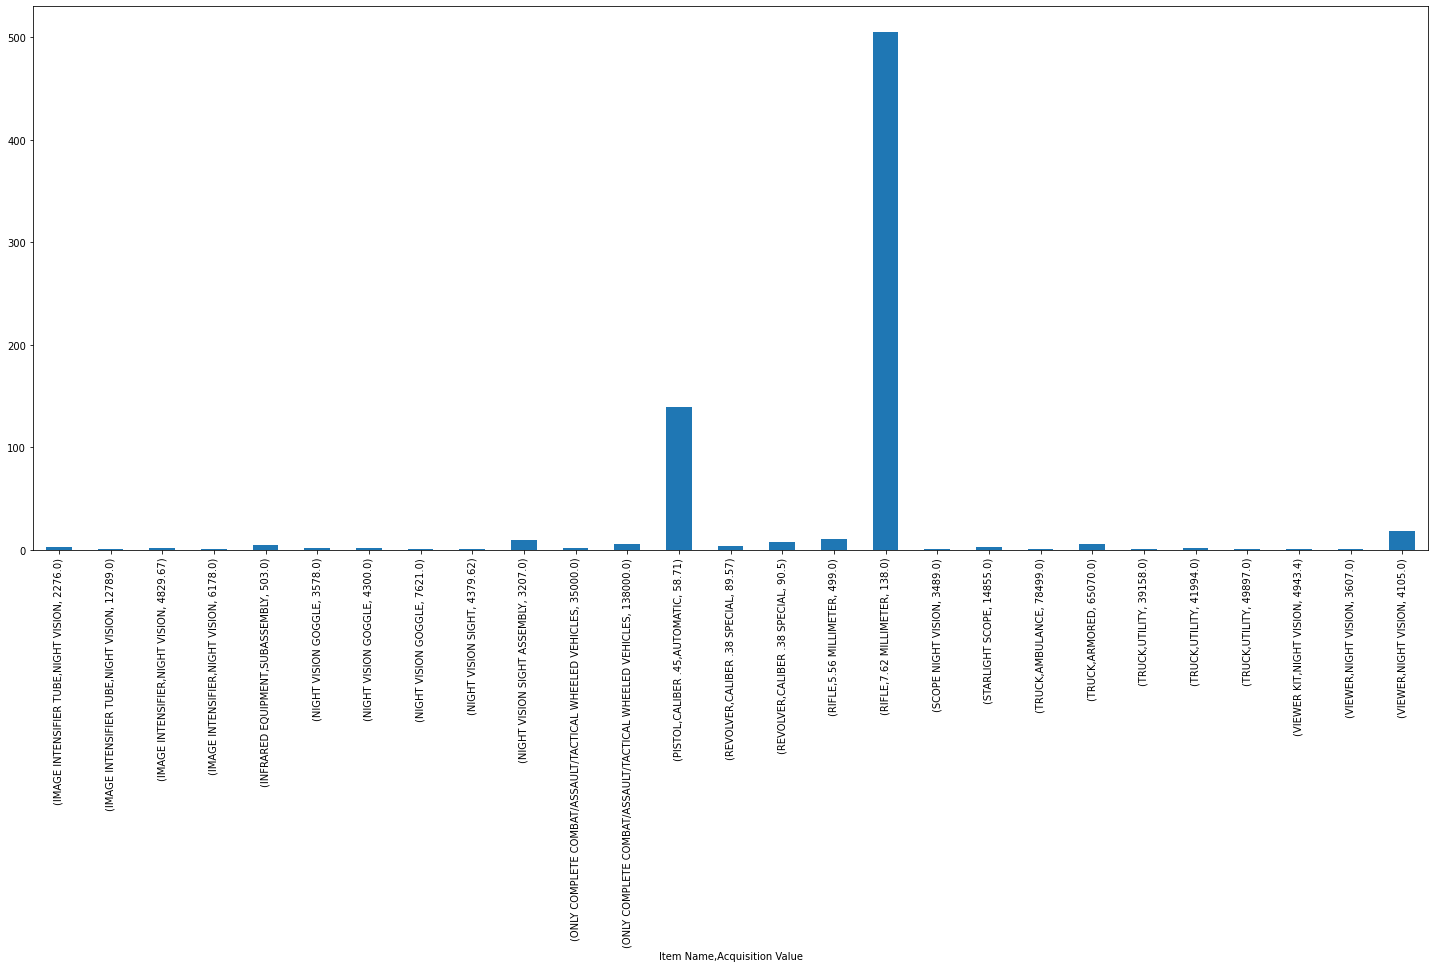

In [219]:
# This shows that in 2000, there were 17 items bought 
# So from the below table, the we have the item name column which display the item's name, then we Acquisition Value 
# which shows two different values and there respective quantity for the said price for the same item.

plt.figure(figsize=(25,10))
df[df['year'] == 2001].groupby(['Item Name', 'Acquisition Value']).count()['Total spending'].plot(kind = 'bar')

In [94]:
df[df['year'] == 2002].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  Total spending
Item Name                                          Acquisition Value         ...                
IMAGE INTENSIFIER TUBE,NIGHT VISION                3131.00                1  ...               1
IMAGE INTENSIFIER,N                                1400.00                1  ...               1
NIGHT VISION EQUIP, EMIT, REFLECTED RAD            583.00                 1  ...               1
NIGHT VISION GOGGLE                                3578.00                1  ...               1
                                                   4300.00                5  ...               5
NIGHT VISION SIGHT                                 825.58                 1  ...               1
NIGHT VISION SIGHT,                                2350.00                1  ...               1
                                                   19000.00               1  ...               1
ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED V... 460000.00              6  ...               6
PISTOL,CALIBER .45,AUTOMATIC                       58.71                280  ...             280
REVOLVER,CALIBER .38 SPECIAL                       89.57                120  ...             120
RIFLE,5.56 MILLIMETER                              499.00              4221  ...            4221
RIFLE,7.62 MILLIMETER                              138.00               660  ...             660
TRUCK,ARMORED                                      65070.00               3  ...               3
TRUCK,UTILITY                                      34622.00               1  ...               1
                                                   40441.00               1  ...               1
                                                   49897.00               1  ...               1
VIEWER,INFRARED                                    1024.00                1  ...               1
VIEWER,NIGHT VISION                                4105.00                1  ...               1

[19 rows x 14 columns]

In [95]:
df[df['year'] == 2003].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  Total spending
Item Name                               Acquisition Value         ...                
CAR,ARMORED                             33707.00               1  ...               1
CARRIER,CARGO                           244120.00              1  ...               1
HELICOPTER,OBSERVATION                  92290.00               1  ...               1
                                        190817.00              1  ...               1
ILLUMINATOR,INFRARED                    1489.95                1  ...               1
IMAGE INTENSIFIER TUBE,NIGHT VISION     2276.00                2  ...               2
                                        2678.00                6  ...               6
IMAGE INTENSIFIER,NIGHT VISION          650.26                 1  ...               1
LIGHT AIMING KIT,INFRARED               545.69                 2  ...               2
NIGHT VISION EQUIP, EMIT, REFLECTED RAD 31440.00               1  ...               1
NIGHT VISION GOGGLE                     4300.00                3  ...               3
OPTICAL SIGHTING AND RANGING EQUIPMENT  9378.13                2  ...               2
                                        10436.67               1  ...               1
                                        10500.00               2  ...               2
PISTOL,CALIBER .45,AUTOMATIC            58.71                473  ...             473
REVOLVER,CALIBER .38 SPECIAL            89.57                 12  ...              12
RIFLE,5.56 MILLIMETER                   499.00              2753  ...            2753
RIFLE,7.62 MILLIMETER                   138.00               791  ...             791
SIGHT UNIT                              1415.00                5  ...               5
THERMAL IMAGINING EQUIPMENT             30000.00               1  ...               1
TRUCK,AMBULANCE                         30691.00               1  ...               1
TRUCK,ARMORED                           65070.00               5  ...               5
TRUCK,UTILITY                           39446.00               1  ...               1

[23 rows x 14 columns]

In [96]:
df[df['year'] == 2004].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  Total spending
Item Name                               Acquisition Value         ...                
HELICOPTER,OBSERVATION                  92290.00               4  ...               4
                                        190817.00              3  ...               3
ILLUMINATOR,INFRARED                    359.00                 2  ...               2
IMAGE INTENSIFIER,NIGHT VISION          10747.00              10  ...              10
NIGHT VISION EQUIP, EMIT, REFLECTED RAD 1180.00                1  ...               1
                                        1495.00                1  ...               1
                                        2500.00                1  ...               1
NIGHT VISION GOGGLE                     3578.00                1  ...               1
NIGHT VISION SIGHT,                     2350.00                1  ...               1
PISTOL,CALIBER .45,AUTOMATIC            58.71                393  ...             393
REVOLVER,CALIBER .38 SPECIAL            89.57                 37  ...              37
RIFLE,5.56 MILLIMETER                   499.00              2444  ...            2444
RIFLE,7.62 MILLIMETER                   138.00               304  ...             304
SHOTGUN,12 GAGE,RIOT TYPE               108.00                 2  ...               2
SIGHT,NIGHT VISION                      5029.00                1  ...               1
THERMAL IMAGER                          16000.00               8  ...               8
THERMAL IMAGING SYSTEM                  13265.94               2  ...               2
TRUCK,ARMORED                           65070.00               3  ...               3
TRUCK,UTILITY                           49897.00               1  ...               1
                                        77522.00               1  ...               1

[20 rows x 14 columns]

In [97]:
df[df['year'] == 2005].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  Total spending
Item Name                                    Acquisition Value         ...                
COLLIMATOR,INFRARED                          2884.00                2  ...               2
HELICOPTER,OBSERVATION                       92290.00               8  ...               8
ILLUMINATOR,INFRARED                         1028.00                2  ...               2
                                             1527.00                1  ...               1
IMAGE INTENSIFIER TUBE,NIGHT VISION          2276.00                5  ...               5
IMAGE INTENSIFIER,NIGHT VISION               56.17                  5  ...               5
                                             4569.00                1  ...               1
                                             13118.00               1  ...               1
INFRARED EQUIPMENT,SUBASSEMBLY               503.00                 1  ...               1
LASER,INFRARED OBS                           4880.00                1  ...               1
NIGHT VISION EQUIP, EMIT, REFLECTED RAD      1495.00                1  ...               1
                                             6000.00                1  ...               1
                                             10436.67               4  ...               4
NIGHT VISION GOGGLE                          4300.00                3  ...               3
                                             7621.00                2  ...               2
NIGHT VISION SIGHT                           4379.62                2  ...               2
NIGHT VISION SIGHT ASSEMBLY                  3207.00               10  ...              10
NIGHT VISION SIGHT INDIVIDUAL SERVED WEAPONS 5650.00                4  ...               4
OPTICAL SIGHTING AND RANGING EQUIPMENT       9378.13                1  ...               1
                                             10436.67               1  ...               1
PISTOL,CALIBER .45,AUTOMATIC                 58.71                337  ...             337
RECEIVER,INFRARED                            7716.00                1  ...               1
REVOLVER,CALIBER .38 SPECIAL                 89.57                 28  ...              28
RIFLE,5.56 MILLIMETER                        499.00              2769  ...            2769
RIFLE,7.62 MILLIMETER                        138.00               257  ...             257
SEARCHLIGHT,INFRARE                          1343.00                1  ...               1
SHOTGUN,12 GAGE,RIOT TYPE                    108.00               163  ...             163
SMALL CRAFT BOAT                             4400000.00             1  ...               1
THERMAL IMAGING SYSTEM                       13265.94               2  ...               2
TRANSMITTER,INFRARED                         28.38                  1  ...               1
                                             78.47                  2  ...               2
TRUCK,ARMORED                                65070.00               3  ...               3
TRUCK,UTILITY                                89900.00               2  ...               2
                                             94171.00               4  ...               4
UNMANNED VEHICLE,GROUND                      10000.00               2  ...               2
VIEWER,NIGHT VISION                          4105.00                2  ...               2
                                             14796.05               2  ...               2
                                             17092.78               1  ...               1

[38 rows x 14 columns]

In [98]:
df[df['year'] == 2006].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  Total spending
Item Name                                    Acquisition Value         ...                
AIRPLANE,CARGO-TRANSPORT                     800865.00              2  ...               2
AIRPLANE,FLIGHT T42A                         102907.00              1  ...               1
CAR,ARMORED                                  33707.00               1  ...               1
ELECTRONIC UNIT,NIGHT VISION VIEWER          28095.02               1  ...               1
HELICOPTER,OBSERVATION                       92290.00              20  ...              20
                                             159398.00              3  ...               3
                                             190817.00             19  ...              19
HELICOPTER,UTILITY                           922704.00              2  ...               2
ILLUMINATOR,INFRARED                         804.57                23  ...              23
                                             1028.00                6  ...               6
IMAGE INTENSIFIER TUBE,NIGHT VISION          1720.00                3  ...               3
IMAGE INTENSIFIER,NIGHT VISION               6178.00                1  ...               1
                                             6624.96                1  ...               1
LIGHT AIMING KIT,INFRARED                    545.69                 5  ...               5
NIGHT VISION EQUIP, EMIT, REFLECTED RAD      1500.00                1  ...               1
                                             4960.00                2  ...               2
                                             8550.00                1  ...               1
                                             10436.67               1  ...               1
                                             24193.00               3  ...               3
NIGHT VISION GOGGLE                          4300.00                2  ...               2
NIGHT VISION SIGHT                           3489.00                3  ...               3
                                             4379.62                2  ...               2
NIGHT VISION SIGHT ASSEMBLY                  3207.00               12  ...              12
NIGHT VISION SIGHT INDIVIDUAL SERVED WEAPONS 5650.00                1  ...               1
PISTOL,CALIBER .45,AUTOMATIC                 58.71                373  ...             373
RIFLE,5.56 MILLIMETER                        499.00              2301  ...            2301
RIFLE,7.62 MILLIMETER                        138.00               329  ...             329
                                             1278.00                1  ...               1
SHOTGUN,12 GAGE,RIOT TYPE                    108.00                 1  ...               1
SIGHT,NIGHT VISION SNIPERSCOPE               9938.14                2  ...               2
TRUCK,ARMORED                                65070.00               2  ...               2
TRUCK,UTILITY                                49897.00               1  ...               1
VIEWER,NIGHT VISION                          1966.95                1  ...               1
                                             2281.44                6  ...               6
                                             4105.00                1  ...               1
                                             14796.05               1  ...               1
                                             17092.78               1  ...               1
VIEWING SET,INFRARE                          2600.00                1  ...               1

[38 rows x 14 columns]

In [99]:
df[df['year'] == 2007].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  Total spending
Item Name                                          Acquisition Value         ...                
AIRCRAFT, FIXED WING                               9000.00                2  ...               2
                                                   105000.00              1  ...               1
AIRPLANE,CARGO-TRANSPORT                           800865.00              1  ...               1
CAR,ARMORED                                        33707.00               4  ...               4
GOGGLES,NIGHT VISION                               5057.09                2  ...               2
HELICOPTER,FLIGHT TRAINER TH55A                    132668.00              1  ...               1
HELICOPTER,OBSERVATION                             92290.00              12  ...              12
HELICOPTER,UTILITY                                 922704.00              1  ...               1
ILLUMINATOR,INFRARED                               359.00                 3  ...               3
                                                   1028.00                4  ...               4
                                                   1489.95                1  ...               1
                                                   14041.36               1  ...               1
IMAGE INTENSIFIER,NIGHT VISION                     3161.86                1  ...               1
                                                   6624.96                5  ...               5
                                                   6655.86                2  ...               2
INFRARED EQUIPMENT,SUBASSEMBLY                     503.00                 1  ...               1
LIGHT AIMING KIT,INFRARED                          545.69                 2  ...               2
                                                   3163.61                2  ...               2
NIGHT VISION EQUIP, EMIT, REFLECTED RAD            4960.00                3  ...               3
                                                   6200.00                6  ...               6
                                                   24193.00               2  ...               2
NIGHT VISION GOGGLE                                3578.00                6  ...               6
NIGHT VISION SIGHT                                 825.58                 1  ...               1
                                                   2208.00                3  ...               3
                                                   4379.62                4  ...               4
NIGHT VISION SIGHT                                 2350.00                4  ...               4
NIGHT VISION SIGHT,                                2350.00                2  ...               2
                                                   2863.00                1  ...               1
ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED V... 150000.00              4  ...               4
                                                   460000.00              1  ...               1
PISTOL,CALIBER .45,AUTOMATIC                       58.71                169  ...             169
RIFLE,5.56 MILLIMETER                              499.00              1331  ...            1331
RIFLE,7.62 MILLIMETER                              138.00               131  ...             131
SCOPE,NIGHT VISION                                 5282.05                2  ...               2
SIGHT                                              2420.60                1  ...               1
THERMAL CAMERA                                     5995.00                9  ...               9
THERMAL IMAGINING EQUIPMENT                        24193.00               8  ...               8
THERMAL SIGHTS                                     29474.00               1  ...               1
TRUCK,ARMORED                                      65070.00              11  ...              11
TRUCK,UTILITY                                      39158.00               1  ...             

In [100]:
df[df['year'] == 2008].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  Total spending
Item Name                               Acquisition Value         ...                
AIRPLANE,CARGO-TRANSPORT                800865.00              3  ...               3
GLIDERS                                 190000.00              1  ...               1
HELICOPTER,OBSERVATION                  92290.00              31  ...              31
                                        159398.00              9  ...               9
                                        190817.00              5  ...               5
HELICOPTER,UTILITY                      922704.00              5  ...               5
ILLUMINATOR,INFRARED                    359.00                 5  ...               5
                                        804.57                33  ...              33
                                        917.84                 1  ...               1
                                        1008.00                1  ...               1
                                        1489.95                1  ...               1
                                        3971.99                1  ...               1
                                        11048.77               1  ...               1
IMAGE CONVERTER,NIGHT VISION            776.97                 1  ...               1
IMAGE INTENSIFIER,NIGHT VISION          5242.97                1  ...               1
                                        6392.00               47  ...              47
                                        6624.96               69  ...              69
                                        6655.86               21  ...              21
                                        13118.00               2  ...               2
LIGHT AIMING KIT,INFRARED               545.69                 1  ...               1
NIGHT VISION EQUIP, EMIT, REFLECTED RAD 1795.00                1  ...               1
                                        2000.00                5  ...               5
                                        4000.00                2  ...               2
NIGHT VISION SIGHT                      4379.62                6  ...               6
NIGHT VISION SIGHT ASSEMBLY             3207.00                2  ...               2
NIGHT VISION SYSTEM                     3300.00                1  ...               1
PISTOL,CALIBER .45,AUTOMATIC            58.71                444  ...             444
RIFLE,5.56 MILLIMETER                   499.00              1166  ...            1166
RIFLE,7.62 MILLIMETER                   138.00               338  ...             338
                                        206.00                10  ...              10
SCOPE,NIGHT VISION                      5282.05                7  ...               7
                                        6360.19               14  ...              14
SHOTGUN,12 GAGE,RIOT TYPE               72.10                158  ...             158
THERMAL IMAGING SYSTEM                  1070.00                1  ...               1
TRUCK,ARMORED                           65070.00               3  ...               3
TRUCK,UTILITY                           39446.00               1  ...               1
                                        40441.00               1  ...               1
                                        49897.00               1  ...               1
TRUCKS AND TRUCK TRACTORS, DEMIL C      107000.00              1  ...               1
VIEWER,NIGHT VISION                     2281.44                5  ...               5
                                        10642.50               1  ...               1
                                        15931.00               3  ...               3
                                        16160.00               1  ...               1
                                        16612.02               1  ...               1
                                        18990.00               2  ...               2
                 

In [197]:
# From 2009, the police force had acquired a lot of items
df[df['year'] == 2009].groupby(['Item Name', 'Acquisition Value']).count()

State  Agency Name  ...  n3  n4
Item Name                      Acquisition Value                      ...        
ADAPTER RAIL,WEAPON MOUNTED    12.03                  1            1  ...   1   1
ADAPTER RAIL,WEAPON MOUNTED,M4 82.16                  1            1  ...   1   1
ADAPTER,GOGGLES,NIGHT VISION   8.00                   1            1  ...   1   1
AIRCRAFT, FIXED WING           9000.00                1            1  ...   1   1
                               105000.00              1            1  ...   1   1
...                                                 ...          ...  ...  ..  ..
VEST COVER,BALLISTI            325.40                 1            1  ...   1   1
VEST,SURVIVAL                  300.28                 1            1  ...   1   1
VIEWER,NIGHT VISION            4105.00               15           15  ...  15  15
                               6939.11                2            2  ...   2   2
                               16612.02               3            3  ...   3   3

[177 rows x 18 columns]

In [198]:
df[df['year'] == 2010].groupby(['Item Name', 'Acquisition Value']).count()

State  Agency Name  ...  n3  n4
Item Name                         Acquisition Value                      ...        
ADAPTER ASSEMBLY,INTERFACE DEVICE 990.98                 1            1  ...   1   1
ADAPTER RAIL,WEAPON MOUNTED       12.03                  1            1  ...   1   1
                                  14.35                  1            1  ...   1   1
ADAPTER RAIL,WEAPON MOUNTED,M4    82.16                  3            3  ...   3   3
ADAPTER,HEADSET                   24.46                  1            1  ...   1   1
...                                                    ...          ...  ...  ..  ..
WINDOW,SACRIFICIAL                4.23                   1            1  ...   1   1
WINDOW,VEHICULAR                  3486.40                2            2  ...   2   2
WINDSCREEN ASSEMBLY               37112.35               1            1  ...   1   1
WIRED HOUSING ASSEMBLY            182.34                 4            4  ...   4   4
YOKE,MAIN ROTOR ASSEMBLY          31506.20               1            1  ...   1   1

[414 rows x 18 columns]

In [199]:
df[df['year'] == 2011].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  n4
Item Name                          Acquisition Value         ...    
ADAPTER 8-32 THREAD                7.37                   1  ...   1
ADAPTER ASSEMBLY,DA                920.93                 1  ...   1
ADAPTER ASSY,TORQUE                1136.00                1  ...   1
ADAPTER RAIL,WEAPON MOUNTED        14.35                  2  ...   2
                                   19.97                  2  ...   2
...                                                     ...  ...  ..
WIRED HOUSING ASSEMBLY             182.34                 1  ...   1
WORKSTATION,PORTABLE MULTIFUNCTION 24000.00               1  ...   1
WRENCH INSERT                      35.48                  3  ...   3
WRENCH,FLEXIBLE SHA                57.39                  1  ...   1
YOKE,RIVETER                       424.28                 2  ...   2

[842 rows x 18 columns]

In [200]:
df[df['year'] == 2012].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  n4
Item Name                               Acquisition Value         ...    
ACTUATOR,ELECTRO-MECHANICAL,LINEAR      8471.27                1  ...   1
ADAPTER RAIL,WEAPON MOUNTED             12.03                  7  ...   7
                                        14.35                  1  ...   1
                                        19.97                  3  ...   3
ADAPTER RAIL,WEAPON MOUNTED,M4          82.16                 30  ...  30
...                                                          ...  ...  ..
WINDOW,VEHICULAR                        1161.31                1  ...   1
                                        1286.64                1  ...   1
                                        1354.18                5  ...   5
WIPER, ARM                              1.00                   1  ...   1
X-RAY APPARATUS,RADIOGRAPHIC,INDUSTRIAL 6058.00                1  ...   1

[923 rows x 18 columns]

In [201]:
df[df['year'] == 2013].groupby(['Item Name', 'Acquisition Value']).count()

State  Agency Name  ...  n3  n4
Item Name                     Acquisition Value                      ...        
ACOG KIT                      174.00                 3            3  ...   3   3
ADAPTER RAIL,WEAPON MOUNTED   12.03                  8            8  ...   8   8
                              19.97                  6            6  ...   6   6
                              424.28                 2            2  ...   2   2
                              1078.44                2            2  ...   2   2
...                                                ...          ...  ...  ..  ..
WINCH,DRUM,POWER OPERATED     9981.00                2            2  ...   2   2
WINDOW,VEHICULAR              2026.22                1            1  ...   1   1
WIRE ROPE ASSEMBLY,SINGLE LEG 88.93                  1            1  ...   1   1
WIRING HARNESS                116.78                 1            1  ...   1   1
XMSMCOVER LIFT PLA            1818.80                1            1  ...   1   1

[678 rows x 18 columns]

In [202]:
df[df['year'] == 2014].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  n4
Item Name                               Acquisition Value         ...    
ACOG KIT                                174.00                 1  ...   1
ACOUSTIC SUPPR KIT                      3138.94                1  ...   1
ADAPTER KIT,BALANCI                     2929.00                1  ...   1
ADAPTER RAIL,WEAPON MOUNTED             12.03                  2  ...   2
                                        14.35                  1  ...   1
...                                                          ...  ...  ..
WIRED HOUSING ASSEMBLY                  182.34                 1  ...   1
WORKSTATION,PORTABLE MULTIFUNCTION      3200.00                1  ...   1
WRENCH,BOX                              1203.00                1  ...   1
X-RAY APPARATUS,RADIOGRAPHIC,INDUSTRIAL 33165.00               1  ...   1
YOKE,TAIL ROTOR                         2534.87                1  ...   1

[795 rows x 18 columns]

In [203]:
df[df['year'] == 2015].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  n4
Item Name                          Acquisition Value         ...    
ACOG KIT                           174.00                 4  ...   4
ACTUATOR,ELECTRO-MECHANICAL,LINEAR 1621.22                1  ...   1
ADAPTER ANTENNA                    134.01                 1  ...   1
ADAPTER RAIL,WEAPON MOUNTED        12.03                  5  ...   5
                                   19.97                  2  ...   2
...                                                     ...  ...  ..
WORKSTATION,PORTABLE MULTIFUNCTION 3200.00                2  ...   2
YOKE ASSY,TAIL ROTO                2600.00                9  ...   9
                                   11177.00               1  ...   1
YOKE,BUFFER RETAINING              4.43                   1  ...   1
ZBV MILITARY TRAILER               1060000.00             1  ...   1

[744 rows x 18 columns]

In [204]:
df[df['year'] == 2016].groupby(['Item Name', 'Acquisition Value']).count()

State  Agency Name  NSN  ...  n2  n3  n4
Item Name           Acquisition Value                           ...            
ACCESSORY KIT,UMBRE 133.00                 1            1    1  ...   1   1   1
ACOG KIT            174.00                 1            1    1  ...   1   1   1
ACTUATOR ASSY,POSIT 3487.19                1            1    1  ...   1   1   1
ADAPTER KIT,BALANCI 2929.00                1            1    1  ...   1   1   1
                    3317.00                1            1    1  ...   1   1   1
...                                      ...          ...  ...  ...  ..  ..  ..
WINDOW,VEHICULAR    2086.34                1            1    1  ...   1   1   1
WSTI U WITH CCTV    55000.00               1            1    1  ...   1   1   1
YOKE ASSY,TAIL ROTO 2600.00                3            3    3  ...   3   3   3
YOKE,CYCLIC CONTR36 1745.37                1            1    1  ...   1   1   1
YOKE,PYLON          719.61                 3            3    3  ...   3   3   3

[755 rows x 18 columns]

In [205]:
df[df['year'] == 2017].groupby(['Item Name', 'Acquisition Value']).count()

State  Agency Name  ...  n3  n4
Item Name                   Acquisition Value                      ...        
ACOG KIT                    174.00                 4            4  ...   4   4
ADAPTER ASSEMBLY,FI         16.11                  2            2  ...   2   2
ADAPTER ASSY,HEATER         210.61                 1            1  ...   1   1
ADAPTER RAIL,WEAPON MOUNTED 19.97                  2            2  ...   2   2
                            30.00                  2            2  ...   2   2
...                                              ...          ...  ...  ..  ..
WINDOW PANEL,AIRCRAFT       699.37                 1            1  ...   1   1
                            849.98                 1            1  ...   1   1
                            1674.42                1            1  ...   1   1
WINDOW,SACRIFICIAL          4.23                   1            1  ...   1   1
WIRING HARNESS,FLEX         1848.99                1            1  ...   1   1

[695 rows x 18 columns]

In [206]:
df[df['year'] == 2018].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  n4
Item Name                          Acquisition Value         ...    
ACCESSORY KIT,ANTENNA              19577.00               1  ...   1
ACOG KIT                           174.00                 3  ...   3
ACTUATOR ASSEMBLY,I                6565.00                1  ...   1
ADAPTER RAIL,WEAPON MOUNTED        19.97                  4  ...   4
                                   30.00                  1  ...   1
...                                                     ...  ...  ..
WINDOW,SACRIFICIAL                 4.23                   2  ...   2
WINDOW,VEHICULAR                   3582.93                1  ...   1
WIRE ROPE ASSEMBLY,SINGLE LEG      174.55                 1  ...   1
WIRED HOUSING ASSEMBLY             3356.99                1  ...   1
WORKSTATION,PORTABLE MULTIFUNCTION 3200.00                1  ...   1

[608 rows x 18 columns]

In [207]:
df[df['year'] == 2019].groupby(['Item Name', 'Acquisition Value']).count()

,,State,Agency Name,NSN,Quantity,UI,DEMIL Code,DEMIL IC,Ship Date,Dates,Time,year,month,day,Total spending,n1,n2,n3,n4
Item Name,Acquisition Value,,,,,,,,,,,,,,,,,,
"ACTUATOR ASSEMBLY,I",6565.00,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
"ACTUATOR,ELECTRO-MECHANICAL,LINEAR",46590.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"ACTUATOR,LINEAR",7370.10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"ADAPTER ASSEMBLY,DA",920.93,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"ADAPTER RAIL,WEAPON MOUNTED",316.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WINDOW PANEL,AIRCRAFT",4810.25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"WINDOW,SACRIFICIAL",4.23,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"WINDOW,VEHICULAR",2311.79,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [208]:
df[df['year'] == 2020].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  n4
Item Name                               Acquisition Value         ...    
ABSORBENT PAD,FLUID,MEDICAL             142.25                 1  ...   1
ACCESSORY KIT,GHILLIE SUIT              378.30                 2  ...   2
ADAPTER RAIL,WEAPON MOUNTED             424.28                 1  ...   1
ADAPTER RAIL,WEAPON MOUNTED,M4          82.16                 16  ...  16
ADAPTER,HEADSET-MICROPHONE              1394.88                1  ...   1
...                                                          ...  ...  ..
WRENCH,TORQUE                           621.05                 1  ...   1
                                        1633.38                1  ...   1
WRENCH,TORQUE,ELECTRONIC                155.10                 1  ...   1
WRINGER,MOP                             101.05                 1  ...   1
X-RAY APPARATUS,RADIOGRAPHIC,INDUSTRIAL 10000.00               1  ...   1

[4869 rows x 18 columns]

In [209]:
df[df['year'] == 2021].groupby(['Item Name', 'Acquisition Value']).count()

State  ...  n4
Item Name                               Acquisition Value         ...    
ABSORBENT MATERIAL,OIL AND WATER        300.00                 2  ...   2
ACCESSORY KIT,PHOTOGRAPHIC              1500.00                1  ...   1
                                        12000.00               1  ...   1
ACCUMULATOR,AIR,TUR                     585.76                 1  ...   1
ACTUATOR,ELECTRO-MECHANICAL,ROTARY      1160.20                2  ...   2
...                                                          ...  ...  ..
WRENCH,WHEEL LUG                        6.41                   1  ...   1
WRINGER,MOP                             110.29                 1  ...   1
X-RAY EQUIP, SUPPLIES: MED, DENTAL, VET 2000.00                1  ...   1
YOKE ASSY,MAIN ROTO                     12067.00               3  ...   3
ZOLL AED                                100.00                 1  ...   1

[5847 rows x 18 columns]